In [1]:
import matplotlib
import sys
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
import gseapy as gp

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from cmapPy.pandasGEXpress.parse import parse
from scipy import stats
from pandas import DataFrame as df
from matplotlib import pyplot as plt
from matplotlib.ft2font import FT2Font
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def get_font(*args, **kwargs):
    return FT2Font(*args, **kwargs)

fm.get_font = get_font

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Global path

In [2]:
data_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/'
gsea_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/GSEA/'
panel_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/panels/Figure1/'
auc_home = panel_home + 'auc/'

# Data

In [3]:
# L1000 gene info
bing_landmark = pd.read_csv(data_home + 'CMAP2020_Cancer/landmark_and_bings_L1000.csv',
                            header=0, index_col=0, sep=',', dtype={'Official NCBI gene symbol': 'str'}, converters={'Official NCBI gene symbol': None})
bing_landmark

Official NCBI gene symbol
Official NCBI gene id                          
5720                                      PSME1
7416                                      VDAC1
55847                                     CISD1
10174                                    SORBS3
25803                                     SPDEF
...                                         ...
5137                                      PDE1C
51233                                    DRICH1
4340                                        MOG
1656                                       DDX6
23620                                     NTSR2

[10174 rows x 1 columns]

In [4]:
gene_sets = {}
with open(gsea_home + '/gene_sets/NREC_REC_91061.gmt', 'r') as f:
    for lines in f:
        lines = lines.rstrip().split('\t')
        gene_sets[lines[0]] = lines[2:]

In [5]:
gene_sets.keys()

dict_keys(['NREC_profile', 'REC_profile'])

# 1. GSE168204

In [6]:
# GSE168204 original expression
expr_168204 = pd.read_csv(data_home + 'GSE168204/GSE168204_MGH_counts_cleaned.csv',
                          index_col=0, header=0, sep=',')
expr_168204.shape

(75253, 27)

In [7]:
expr_168204

MGH200_FFPE_031116  MGH200_FFPE_072716  MGH530_FFPE_082916  \
Gene                                                                  
A1BG                     92                 151                 305   
A1CF                      6                   5                  13   
A2M                   24231               26862               11083   
A2ML1                    22                  59                 415   
A3GALT2                   3                  36                   1   
...                     ...                 ...                 ...   
ZYG11A                    0                  91                   4   
ZYG11B                 1198                1292                1579   
ZYX                    3645                4960                1369   
ZZEF1                  5316                5070                4161   
ZZZ3                   1470                2293                2382   

         MGH530_FFPE_091916  MGH530_FFPE_032417  MGHBI1_101415  \
Gene                                                             
A1BG                    262                 338            193   
A1CF                      0                   0              2   
A2M                   44622                4717           8208   
A2ML1                  3191                   2              5   
A3GALT2                   7                   2              8   
...                     ...                 ...            ...   
ZYG11A                  143                   5             55   
ZYG11B                 2255                 664           1147   
ZYX                    7871                1909           3598   
ZZEF1                 11118                 743            787   
ZZZ3                   3596                 319            795   

         MGHIPIPD1001_041814  MGHIPIPD1001_092414  MGHIPIPD1001_070215-1  \
Gene                                                                       
A1BG                     437                  402                    470   
A1CF                       0                    0                      0   
A2M                    13288                22631                  31820   
A2ML1                      0                    7                      3   
A3GALT2                    1                    1                      0   
...                      ...                  ...                    ...   
ZYG11A                     1                    0                      1   
ZYG11B                  1786                 2469                   2290   
ZYX                     3952                 2912                   1426   
ZZEF1                   1275                 2348                   3239   
ZZZ3                     762                 1195                   1248   

         MGHIPIPD1001_070215-2  ...  MGH253_111214  MGH253_070616  \
Gene                            ...                                 
A1BG                       280  ...            392            320   
A1CF                         0  ...              0              0   
A2M                      13732  ...           4128           1725   
A2ML1                        1  ...             28             28   
A3GALT2                      2  ...              9              3   
...                        ...  ...            ...            ...   
ZYG11A                       2  ...              8             34   
ZYG11B                    1507  ...           1441           2259   
ZYX                       1487  ...           3763           2542   
ZZEF1                     1545  ...           2549           2738   
ZZZ3                       730  ...           1344           1075   

         MGH409_113015  MGH51-081413  MGH51-041814  MGH98-030314  \
Gene                                                               
A1BG                70            88           139           218   
A1CF                 0             1             0             0   
A2M              31951          9520         15402          3955   

In [8]:
hg38_annot = pd.read_csv('/home/dyang-server/hdd/Yue/PROJECTS/collaboration/TCGA-GDC/GRCh38_ENSG_to_symbol_with_chr_loc.csv',
                         index_col=0, header=0, sep=',')

In [9]:
for x in expr_168204[~expr_168204.index.isin(hg38_annot['gene_symbol'])][:50].index:
    print(x)

ADRBK1
ADRBK2
APOA1BP
APOBEC3A_B
BAGE
BAGE3
BAGE4
BZRAP1
C10orf12
C10orf131
C11orf73
C11orf85
C15orf43
C18orf42
C1orf233
C1orf95
C20orf195
C2orf44
C3orf17
C4B_2
C4orf27
C5orf28
C7orf60
C7orf76
C9orf173
C9orf9
CARKD
CBWD6
CCBL1
CCBL2
CCDC64
CCDC64B
CCDC79
CCL3L1
CCL4L1
CGB
CSRP2BP
CT45A4
DCDC5
DDX26B
DFNB31
EFTUD1
ENTHD2
ERBB2IP
ERCC6-PGBD3
FAM132B
FAM195A
FAM195B
FDX1L
FIGF


In [10]:
hg38_annot[~hg38_annot['gene_symbol'].isin(expr_168204.index)]

gene_symbol                    chr:loc
ENSG00000223972     DDX11L1           chr1:11869-14409
ENSG00000227232      WASH7P           chr1:14404-29570
ENSG00000237613     FAM138A           chr1:34554-36081
ENSG00000268020      OR4G4P           chr1:52473-53312
ENSG00000240361     OR4G11P           chr1:62948-63887
...                     ...                        ...
ENSG00000275063  AC233755.1  chrKI270726.1:41444-41876
ENSG00000271254  AC240274.1   chrKI270711.1:4612-29626
ENSG00000275405          U1  chrKI270713.1:21861-22024
ENSG00000275987          U1  chrKI270713.1:30437-30580
ENSG00000277475  AC213203.1  chrKI270713.1:31698-32528

[37344 rows x 2 columns]

In [11]:
expr_168204.loc['CXCL10', :]

MGH200_FFPE_031116         352.0
MGH200_FFPE_072716          21.0
MGH530_FFPE_082916         353.0
MGH530_FFPE_091916        8783.0
MGH530_FFPE_032417         903.0
MGHBI1_101415              156.0
MGHIPIPD1001_041814        184.0
MGHIPIPD1001_092414        158.0
MGHIPIPD1001_070215-1       29.0
MGHIPIPD1001_070215-2      161.0
MGHIPIPD1001_070715-1       47.0
MGHIPIPD1001_070715-2       65.0
MGHIPIPD1001_070715-3       66.0
MGH27_032812               210.0
MGH27_070213             33603.0
MGH35_091015              4395.0
MGH99_041914              1932.0
MGH253_111214               37.0
MGH253_070616               39.0
MGH409_113015              158.0
MGH51-081413               407.0
MGH51-041814             10315.0
MGH98-030314               189.0
MGH98-051514              1900.0
MGHPDL002-061812          8304.0
MGHPDL002-080112          6028.0
148-12-13-14_S10            10.0
Name: CXCL10, dtype: float64

In [12]:
hg38_annot['gene_symbol'].shape

(58051,)

In [13]:
hg38_annot['gene_symbol'].unique().shape

(56303,)

In [14]:
# overlap with the L1000 space
expr_168204 = expr_168204[expr_168204.index.isin(bing_landmark['Official NCBI gene symbol'])]

# read clinical information
info_168204 = pd.read_csv(data_home + 'GSE168204/GSE168204_patient_info.csv',
                          index_col=0, header=0, sep=',')
print(expr_168204.shape, info_168204.shape)

(10059, 27) (27, 2)


In [15]:
pd.crosstab(info_168204['time'], info_168204['response'])

response  NR  R
time           
POST      13  4
PRE        5  5

In [16]:
log2exp2_168204 = np.log2(expr_168204 + 1)
# collapse duplicates
log2exp2_168204 = log2exp2_168204.groupby(level=0).mean()

In [17]:
log2exp2_168204 = log2exp2_168204[log2exp2_168204 > 0].dropna(axis=0, how='all').fillna(0)

In [18]:
# take the subset
log2exp2_168204_NREC = log2exp2_168204[log2exp2_168204.index.isin(gene_sets['NREC_profile'])]
log2exp2_168204_REC = log2exp2_168204[log2exp2_168204.index.isin(gene_sets['REC_profile'])]

In [19]:
# add color
lut_168204 = {'R': {'PRE': 'royalblue', 'POST': 'lightsteelblue'}, 'NR': {'PRE': 'crimson', 'POST': 'pink'}}

In [20]:
info_168204['colorbar'] = ''
for p in info_168204.index:
    info_168204.at[p, 'colorbar'] = lut_168204[info_168204.loc[p, 'response']][info_168204.loc[p, 'time']]

In [21]:
mean_ec_168204 = df(index=log2exp2_168204.columns, columns=['NREC', 'REC'])
for p in mean_ec_168204.index:
    mean_ec_168204.at[p, 'NREC'] = log2exp2_168204_NREC[p].mean()
    mean_ec_168204.at[p, 'REC'] = log2exp2_168204_REC[p].mean()

In [22]:
mean_ec_168204['response'] = info_168204['response']

In [23]:
mean_ec_168204['time'] = info_168204['time']

In [24]:
mean_ec_168204

NREC      REC response  time
MGH200_FFPE_031116      8.8041  7.94452        R   PRE
MGH200_FFPE_072716     9.50214  7.38408        R  POST
MGH530_FFPE_082916     10.0237  7.29498        R   PRE
MGH530_FFPE_091916     10.5365  9.04825        R  POST
MGH530_FFPE_032417     7.89535  6.02421        R  POST
MGHBI1_101415          9.53406  7.07075       NR   PRE
MGHIPIPD1001_041814       10.4  7.63797       NR   PRE
MGHIPIPD1001_092414    11.0177  7.49652       NR  POST
MGHIPIPD1001_070215-1  11.2112  7.41289       NR  POST
MGHIPIPD1001_070215-2  10.2639  7.77302       NR  POST
MGHIPIPD1001_070715-1  9.75111  7.86053       NR  POST
MGHIPIPD1001_070715-2  10.1316  7.25698       NR  POST
MGHIPIPD1001_070715-3  9.77191  7.49332       NR  POST
MGH27_032812           10.0908  6.48356       NR   PRE
MGH27_070213           12.6846  10.2584       NR  POST
MGH35_091015           8.85514  7.67682        R   PRE
MGH99_041914            10.488  7.59657       NR  POST
MGH253_111214          10.4581  5.88608       NR   PRE
MGH253_070616           10.606  5.88303       NR  POST
MGH409_113015          9.15484  8.11726        R   PRE
MGH51-081413           9.86758  8.16536       NR  POST
MGH51-041814           10.1335  8.72344       NR  POST
MGH98-030314           10.3066  6.41157        R   PRE
MGH98-051514           8.83581  8.94301        R  POST
MGHPDL002-061812         10.46  9.02337       NR   PRE
MGHPDL002-080112       10.3783  8.85136       NR  POST
148-12-13-14_S10       5.66899  4.87909       NR  POST

<AxesSubplot:xlabel='NREC', ylabel='REC'>

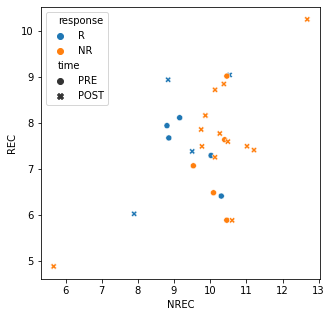

In [25]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='NREC', y='REC', hue='response', style='time', data=mean_ec_168204)

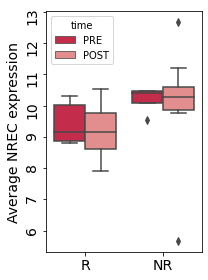

In [26]:
plt.figure(figsize=(3, 4))
sns.boxplot(x='response', y='NREC', hue='time', data=mean_ec_168204,
            palette={'PRE': 'crimson', 'POST': 'lightcoral'})
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('')
plt.yticks(rotation=90, fontsize=14)
plt.ylabel('Average NREC expression', fontsize=14)
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + '/validation/GSE168204_ave_NREC.png', transparent=True, dpi=300)
fig.savefig(panel_home + '/validation/GSE168204_ave_NREC.pdf', transparent=True)

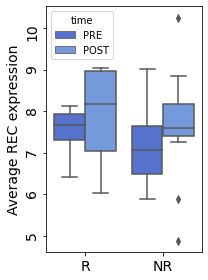

In [27]:
plt.figure(figsize=(3, 4))
sns.boxplot(x='response', y='REC', hue='time', data=mean_ec_168204,
            palette={'PRE': 'royalblue', 'POST': 'cornflowerblue'})

plt.xticks(rotation=0, fontsize=14)
plt.xlabel('')
plt.yticks(rotation=90, fontsize=14)
plt.ylabel('Average REC expression', fontsize=14)
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + '/validation/GSE168204_ave_REC.png', transparent=True, dpi=300)
fig.savefig(panel_home + '/validation/GSE168204_ave_REC.pdf', transparent=True)

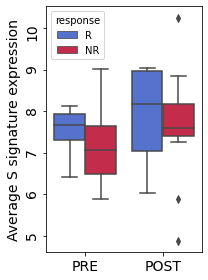

In [33]:
plt.figure(figsize=(3, 4))
sns.boxplot(x='time', y='REC', hue='response', data=mean_ec_168204,
            palette={'R': 'royalblue', 'NR': 'crimson'})

plt.xticks(rotation=0, fontsize=14)
plt.xlabel('')
plt.yticks(rotation=90, fontsize=14)
plt.ylabel('Average S signature expression', fontsize=14)
plt.tight_layout()
fig = plt.gcf()
# fig.savefig(panel_home + '/validation/GSE168204_ave_REC.png', transparent=True, dpi=300)
# fig.savefig(panel_home + '/validation/GSE168204_ave_REC.pdf', transparent=True)

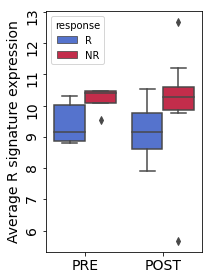

In [34]:
plt.figure(figsize=(3, 4))
sns.boxplot(x='time', y='NREC', hue='response', data=mean_ec_168204,
            palette={'R': 'royalblue', 'NR': 'crimson'})

plt.xticks(rotation=0, fontsize=14)
plt.xlabel('')
plt.yticks(rotation=90, fontsize=14)
plt.ylabel('Average R signature expression', fontsize=14)
plt.tight_layout()
fig = plt.gcf()

# CXCL10, PAK4

In [42]:
case_cxcl10 = df(index=log2exp2_168204.columns, columns=['CXCL10', 'PAK4'])
case_cxcl10['CXCL10'] = log2exp2_168204.loc['CXCL10', :]
case_cxcl10['PAK4'] = log2exp2_168204.loc['PAK4', :]

In [43]:
case_cxcl10['response'] = info_168204['response']
case_cxcl10['time'] = info_168204['time']

In [44]:
case_cxcl10

CXCL10       PAK4 response  time
MGH200_FFPE_031116      8.463524   8.800900        R   PRE
MGH200_FFPE_072716      4.459432  10.482808        R  POST
MGH530_FFPE_082916      8.467606  10.171177        R   PRE
MGH530_FFPE_091916     13.100662  11.677279        R  POST
MGH530_FFPE_032417      9.820179   7.629357        R  POST
MGHBI1_101415           7.294621   9.407268       NR   PRE
MGHIPIPD1001_041814     7.531381  11.197217       NR   PRE
MGHIPIPD1001_092414     7.312883  12.037890       NR  POST
MGHIPIPD1001_070215-1   4.906891  12.519391       NR  POST
MGHIPIPD1001_070215-2   7.339850  11.163021       NR  POST
MGHIPIPD1001_070715-1   5.584963   9.958553       NR  POST
MGHIPIPD1001_070715-2   6.044394  10.367415       NR  POST
MGHIPIPD1001_070715-3   6.066089  10.745674       NR  POST
MGH27_032812            7.721099  10.727920       NR   PRE
MGH27_070213           15.036345  12.920725       NR  POST
MGH35_091015           12.101976   8.957102        R   PRE
MGH99_041914           10.916626  11.997532       NR  POST
MGH253_111214           5.247928  10.773963       NR   PRE
MGH253_070616           5.321928  10.939579       NR  POST
MGH409_113015           7.312883   9.741467        R   PRE
MGH51-081413            8.672425  10.682117       NR  POST
MGH51-041814           13.332596  10.944712       NR  POST
MGH98-030314            7.569856  10.491853        R   PRE
MGH98-051514           10.892543   9.308339        R  POST
MGHPDL002-061812       13.019764  10.646559       NR   PRE
MGHPDL002-080112       12.557703  10.686501       NR  POST
148-12-13-14_S10        3.459432   7.977280       NR  POST

In [75]:
# compare expression between pre- and post- for each gene in the TEC signature
# (separately for responder and non-responder)
r_all = info_168204[info_168204['response'] == 'R']
nr_all = info_168204[info_168204['response'] == 'NR']
r_pre = r_all[r_all['time'] == 'PRE']
r_post = r_all[r_all['time'] == 'POST']
nr_pre = nr_all[nr_all['time'] == 'PRE']
nr_post = nr_all[nr_all['time'] == 'POST']

TEC_de_result = df(index=log2exp2_168204.index, columns=['r_t_stat', 'r_t_p', 'r_mean_ec',
                            'nr_t_stat', 'nr_t_p', 'nr_mean_ec',
                            'TEC_class'])
for g in TEC_de_result.index:
    TEC_de_result.at[g, 'r_t_stat'], TEC_de_result.at[g, 'r_t_p'] = stats.ttest_ind(log2exp2_168204.loc[g, r_post.index], log2exp2_168204.loc[g, r_pre.index])
    TEC_de_result.at[g, 'r_mean_ec'] = log2exp2_168204.loc[g, r_post.index].mean() - log2exp2_168204.loc[g, r_pre.index].mean()
    TEC_de_result.at[g, 'nr_t_stat'], TEC_de_result.at[g, 'nr_t_p'] = stats.ttest_ind(log2exp2_168204.loc[g, nr_post.index], log2exp2_168204.loc[g, nr_pre.index])
    TEC_de_result.at[g, 'nr_mean_ec'] = log2exp2_168204.loc[g, nr_post.index].mean() - log2exp2_168204.loc[g, nr_pre.index].mean()
        
    if g in gene_sets['NREC_profile']:
        TEC_de_result.at[g, 'TEC_class'] = 'TEC-R'
    elif g in gene_sets['REC_profile']:
        TEC_de_result.at[g, 'TEC_class'] = 'TEC-S'
    else:
        TEC_de_result.at[g, 'TEC_class'] = 'non-TEC'

In [76]:
TEC_de_result = TEC_de_result.dropna(axis=0, how='any')

In [77]:
TEC_de_result

r_t_stat     r_t_p  r_mean_ec nr_t_stat     nr_t_p nr_mean_ec  \
Gene                                                                     
A2M        0.1715  0.868683    0.15048  0.539755   0.596799    0.44924   
A4GALT  -0.848274  0.424339   -1.89309  0.408165   0.688563   0.448707   
AAAS     -1.00366  0.348968  -0.913536 -0.377618   0.710677  -0.239758   
AACS     0.239966  0.817232   0.232779   0.87326   0.395439    0.69016   
AADAC    0.827764  0.435113    1.75176    2.4657  0.0253623    3.34311   
...           ...       ...        ...       ...        ...        ...   
ZWINT    -1.07671  0.317312   -0.97078 -0.058187    0.95432 -0.0538411   
ZXDC     0.408548   0.69508   0.325957  -0.18954   0.852053  -0.244041   
ZYX      0.790839  0.454993    0.45975 -0.958821   0.351915   -1.45595   
ZZEF1    0.166896  0.872171   0.145519 -0.212079   0.834723  -0.309716   
ZZZ3   -0.0327645  0.974777 -0.0273224 -0.345435   0.734267  -0.472349   

       TEC_class  
Gene              
A2M      non-TEC  
A4GALT   non-TEC  
AAAS       TEC-R  
AACS       TEC-R  
AADAC    non-TEC  
...          ...  
ZWINT    non-TEC  
ZXDC     non-TEC  
ZYX      non-TEC  
ZZEF1    non-TEC  
ZZZ3     non-TEC  

[9953 rows x 7 columns]

(-4.0, 4.0)

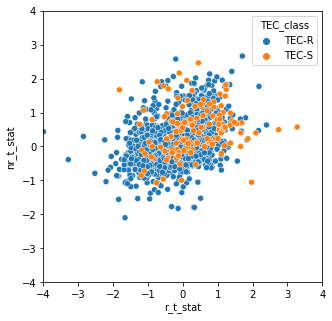

In [62]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='r_t_stat', y='nr_t_stat', hue='TEC_class', data=TEC_de_result)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

(-4.0, 4.0)

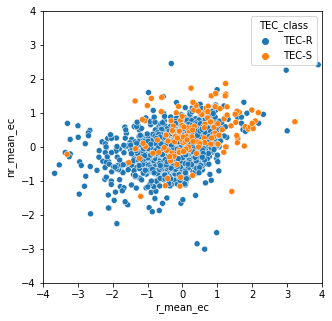

In [63]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='r_mean_ec', y='nr_mean_ec', hue='TEC_class', data=TEC_de_result)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

<AxesSubplot:xlabel='TEC_class', ylabel='r_t_stat'>

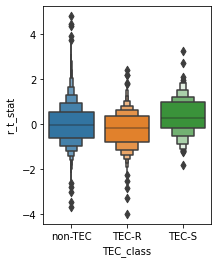

In [80]:
plt.figure(figsize=(3, 4))
sns.boxenplot(x='TEC_class', y='r_t_stat', data=TEC_de_result)

<AxesSubplot:xlabel='TEC_class', ylabel='nr_t_stat'>

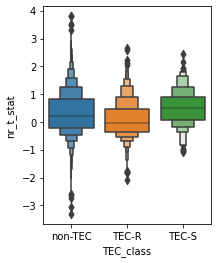

In [79]:
plt.figure(figsize=(3, 4))
sns.boxenplot(x='TEC_class', y='nr_t_stat', data=TEC_de_result)

In [27]:
# compare z-score sum between pre- and post- for each gene in the TEC signature
# (separately for responder and non-responder)
TEC_zsum_result = df(index=log2exp2_168204.columns, columns=['nr_z_ec', 'r_z_ec', 'response', 'time'])
z_log2_168204 = log2exp2_168204.T.apply(stats.zscore).T

for p in TEC_zsum_result.index:
    TEC_zsum_result.at[p, 'nr_z_ec'] = df(z_log2_168204[p]).loc[log2exp2_168204_NREC.index, :].mean(axis=0)[p]
    TEC_zsum_result.at[p, 'r_z_ec'] = df(z_log2_168204[p]).loc[log2exp2_168204_REC.index, :].mean(axis=0)[p]
[p]
TEC_zsum_result['time'] = info_168204['time']
TEC_zsum_result['response'] = info_168204['response']

In [28]:
z_log2_168204.mean(axis=0)

MGH200_FFPE_031116      -0.289989
MGH200_FFPE_072716       0.072859
MGH530_FFPE_082916       0.014656
MGH530_FFPE_091916       0.610424
MGH530_FFPE_032417      -1.243655
MGHBI1_101415           -0.317418
MGHIPIPD1001_041814      0.097648
MGHIPIPD1001_092414      0.307345
MGHIPIPD1001_070215-1    0.369932
MGHIPIPD1001_070215-2    0.052970
MGHIPIPD1001_070715-1    0.007018
MGHIPIPD1001_070715-2    0.095089
MGHIPIPD1001_070715-3    0.038218
MGH27_032812            -0.174414
MGH27_070213             1.413130
MGH35_091015            -0.545311
MGH99_041914             0.138855
MGH253_111214            0.050269
MGH253_070616            0.068375
MGH409_113015            0.032672
MGH51-081413             0.224138
MGH51-041814             0.051950
MGH98-030314            -0.047480
MGH98-051514            -0.147327
MGHPDL002-061812         0.302262
MGHPDL002-080112         0.290734
148-12-13-14_S10        -1.472949
dtype: float64

In [29]:
z_log2_168204.mean(axis=1)

Gene
A2M      -1.496745e-15
A4GALT    3.289550e-17
AAAS     -1.052656e-15
AACS      2.960595e-16
AADAC    -5.345518e-17
              ...     
ZWINT     2.878356e-16
ZXDC      3.618505e-16
ZYX       1.644775e-16
ZZEF1     3.289550e-17
ZZZ3      3.289550e-16
Length: 10050, dtype: float64

In [30]:
TEC_zsum_result['patient_mean'] = z_log2_168204.mean(axis=0)

In [31]:
TEC_zsum_result

nr_z_ec       r_z_ec response  time  patient_mean
MGH200_FFPE_031116     -0.614055     0.161335        R   PRE     -0.289989
MGH200_FFPE_072716     -0.153272    -0.121355        R  POST      0.072859
MGH530_FFPE_082916      0.116302     -0.18998        R   PRE      0.014656
MGH530_FFPE_091916      0.480007     0.760807        R  POST      0.610424
MGH530_FFPE_032417      -1.20837    -0.903312        R  POST     -1.243655
MGHBI1_101415          -0.270551    -0.301251       NR   PRE     -0.317418
MGHIPIPD1001_041814     0.278557    0.0434098       NR   PRE      0.097648
MGHIPIPD1001_092414     0.678658   0.00172369       NR  POST      0.307345
MGHIPIPD1001_070215-1   0.806918   -0.0514824       NR  POST      0.369932
MGHIPIPD1001_070215-2   0.185633     0.110797       NR  POST      0.052970
MGHIPIPD1001_070715-1  -0.125243     0.156634       NR  POST      0.007018
MGHIPIPD1001_070715-2   0.103442    -0.158945       NR  POST      0.095089
MGHIPIPD1001_070715-3  -0.115547   -0.0392651       NR  POST      0.038218
MGH27_032812           0.0825157    -0.598336       NR   PRE     -0.174414
MGH27_070213             1.76109      1.47054       NR  POST      1.413130
MGH35_091015           -0.715768   -0.0210215        R   PRE     -0.545311
MGH99_041914            0.355377  0.000801447       NR  POST      0.138855
MGH253_111214           0.339576    -0.853863       NR   PRE      0.050269
MGH253_070616           0.440704    -0.863006       NR  POST      0.068375
MGH409_113015          -0.443591     0.298895        R   PRE      0.032672
MGH51-081413           0.0122844     0.311595       NR  POST      0.224138
MGH51-041814            0.104984     0.573316       NR  POST      0.051950
MGH98-030314            0.211747    -0.588545        R   PRE     -0.047480
MGH98-051514           -0.666903     0.683182        R  POST     -0.147327
MGHPDL002-061812        0.320427     0.737894       NR   PRE      0.302262
MGHPDL002-080112        0.271604     0.640056       NR  POST      0.290734
148-12-13-14_S10        -2.23652     -1.26062       NR  POST     -1.472949

In [32]:
TEC_zsum_result['R-S'] = TEC_zsum_result['nr_z_ec'] - TEC_zsum_result['r_z_ec']

In [33]:
TEC_zsum_result[TEC_zsum_result['time'] == 'POST'].sort_values(by='nr_z_ec', ascending=False)

nr_z_ec       r_z_ec response  time  patient_mean  \
MGH27_070213             1.76109      1.47054       NR  POST      1.413130   
MGHIPIPD1001_070215-1   0.806918   -0.0514824       NR  POST      0.369932   
MGHIPIPD1001_092414     0.678658   0.00172369       NR  POST      0.307345   
MGH530_FFPE_091916      0.480007     0.760807        R  POST      0.610424   
MGH253_070616           0.440704    -0.863006       NR  POST      0.068375   
MGH99_041914            0.355377  0.000801447       NR  POST      0.138855   
MGHPDL002-080112        0.271604     0.640056       NR  POST      0.290734   
MGHIPIPD1001_070215-2   0.185633     0.110797       NR  POST      0.052970   
MGH51-041814            0.104984     0.573316       NR  POST      0.051950   
MGHIPIPD1001_070715-2   0.103442    -0.158945       NR  POST      0.095089   
MGH51-081413           0.0122844     0.311595       NR  POST      0.224138   
MGHIPIPD1001_070715-3  -0.115547   -0.0392651       NR  POST      0.038218   
MGHIPIPD1001_070715-1  -0.125243     0.156634       NR  POST      0.007018   
MGH200_FFPE_072716     -0.153272    -0.121355        R  POST      0.072859   
MGH98-051514           -0.666903     0.683182        R  POST     -0.147327   
MGH530_FFPE_032417      -1.20837    -0.903312        R  POST     -1.243655   
148-12-13-14_S10        -2.23652     -1.26062       NR  POST     -1.472949   

                             R-S  
MGH27_070213            0.290548  
MGHIPIPD1001_070215-1     0.8584  
MGHIPIPD1001_092414     0.676935  
MGH530_FFPE_091916       -0.2808  
MGH253_070616            1.30371  
MGH99_041914            0.354575  
MGHPDL002-080112       -0.368453  
MGHIPIPD1001_070215-2   0.074836  
MGH51-041814           -0.468331  
MGHIPIPD1001_070715-2   0.262387  
MGH51-081413            -0.29931  
MGHIPIPD1001_070715-3 -0.0762818  
MGHIPIPD1001_070715-1  -0.281877  
MGH200_FFPE_072716    -0.0319165  
MGH98-051514            -1.35009  
MGH530_FFPE_032417     -0.305057  
148-12-13-14_S10       -0.975902

In [34]:
TEC_zsum_result[TEC_zsum_result['time'] == 'POST'].sort_values(by='r_z_ec', ascending=False)

nr_z_ec       r_z_ec response  time  patient_mean  \
MGH27_070213             1.76109      1.47054       NR  POST      1.413130   
MGH530_FFPE_091916      0.480007     0.760807        R  POST      0.610424   
MGH98-051514           -0.666903     0.683182        R  POST     -0.147327   
MGHPDL002-080112        0.271604     0.640056       NR  POST      0.290734   
MGH51-041814            0.104984     0.573316       NR  POST      0.051950   
MGH51-081413           0.0122844     0.311595       NR  POST      0.224138   
MGHIPIPD1001_070715-1  -0.125243     0.156634       NR  POST      0.007018   
MGHIPIPD1001_070215-2   0.185633     0.110797       NR  POST      0.052970   
MGHIPIPD1001_092414     0.678658   0.00172369       NR  POST      0.307345   
MGH99_041914            0.355377  0.000801447       NR  POST      0.138855   
MGHIPIPD1001_070715-3  -0.115547   -0.0392651       NR  POST      0.038218   
MGHIPIPD1001_070215-1   0.806918   -0.0514824       NR  POST      0.369932   
MGH200_FFPE_072716     -0.153272    -0.121355        R  POST      0.072859   
MGHIPIPD1001_070715-2   0.103442    -0.158945       NR  POST      0.095089   
MGH253_070616           0.440704    -0.863006       NR  POST      0.068375   
MGH530_FFPE_032417      -1.20837    -0.903312        R  POST     -1.243655   
148-12-13-14_S10        -2.23652     -1.26062       NR  POST     -1.472949   

                             R-S  
MGH27_070213            0.290548  
MGH530_FFPE_091916       -0.2808  
MGH98-051514            -1.35009  
MGHPDL002-080112       -0.368453  
MGH51-041814           -0.468331  
MGH51-081413            -0.29931  
MGHIPIPD1001_070715-1  -0.281877  
MGHIPIPD1001_070215-2   0.074836  
MGHIPIPD1001_092414     0.676935  
MGH99_041914            0.354575  
MGHIPIPD1001_070715-3 -0.0762818  
MGHIPIPD1001_070215-1     0.8584  
MGH200_FFPE_072716    -0.0319165  
MGHIPIPD1001_070715-2   0.262387  
MGH253_070616            1.30371  
MGH530_FFPE_032417     -0.305057  
148-12-13-14_S10       -0.975902

In [35]:
TEC_zsum_result[TEC_zsum_result['time'] == 'PRE'].sort_values(by='nr_z_ec', ascending=False)

nr_z_ec     r_z_ec response time  patient_mean  \
MGH253_111214         0.339576  -0.853863       NR  PRE      0.050269   
MGHPDL002-061812      0.320427   0.737894       NR  PRE      0.302262   
MGHIPIPD1001_041814   0.278557  0.0434098       NR  PRE      0.097648   
MGH98-030314          0.211747  -0.588545        R  PRE     -0.047480   
MGH530_FFPE_082916    0.116302   -0.18998        R  PRE      0.014656   
MGH27_032812         0.0825157  -0.598336       NR  PRE     -0.174414   
MGHBI1_101415        -0.270551  -0.301251       NR  PRE     -0.317418   
MGH409_113015        -0.443591   0.298895        R  PRE      0.032672   
MGH200_FFPE_031116   -0.614055   0.161335        R  PRE     -0.289989   
MGH35_091015         -0.715768 -0.0210215        R  PRE     -0.545311   

                           R-S  
MGH253_111214          1.19344  
MGHPDL002-061812     -0.417467  
MGHIPIPD1001_041814   0.235147  
MGH98-030314          0.800292  
MGH530_FFPE_082916    0.306282  
MGH27_032812          0.680851  
MGHBI1_101415        0.0306993  
MGH409_113015        -0.742486  
MGH200_FFPE_031116    -0.77539  
MGH35_091015         -0.694746

In [36]:
TEC_zsum_result[TEC_zsum_result['time'] == 'PRE'].sort_values(by='r_z_ec', ascending=False)

nr_z_ec     r_z_ec response time  patient_mean  \
MGHPDL002-061812      0.320427   0.737894       NR  PRE      0.302262   
MGH409_113015        -0.443591   0.298895        R  PRE      0.032672   
MGH200_FFPE_031116   -0.614055   0.161335        R  PRE     -0.289989   
MGHIPIPD1001_041814   0.278557  0.0434098       NR  PRE      0.097648   
MGH35_091015         -0.715768 -0.0210215        R  PRE     -0.545311   
MGH530_FFPE_082916    0.116302   -0.18998        R  PRE      0.014656   
MGHBI1_101415        -0.270551  -0.301251       NR  PRE     -0.317418   
MGH98-030314          0.211747  -0.588545        R  PRE     -0.047480   
MGH27_032812         0.0825157  -0.598336       NR  PRE     -0.174414   
MGH253_111214         0.339576  -0.853863       NR  PRE      0.050269   

                           R-S  
MGHPDL002-061812     -0.417467  
MGH409_113015        -0.742486  
MGH200_FFPE_031116    -0.77539  
MGHIPIPD1001_041814   0.235147  
MGH35_091015         -0.694746  
MGH530_FFPE_082916    0.306282  
MGHBI1_101415        0.0306993  
MGH98-030314          0.800292  
MGH27_032812          0.680851  
MGH253_111214          1.19344

In [40]:
table = TEC_zsum_result.copy()
table = table.rename(columns={'nr_z_ec': 'S_mean',
                              'r_z_ec': 'R_mean',
                              'R-S': 'R_mean - S_mean'})
table.to_csv('/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/Tables/TableS1/GSE168204_RS_value.csv', sep=',')

In [37]:
patient_palette={'R': 'royalblue', 'NR': 'crimson'}
TEC_zsum_result['response_color'] = TEC_zsum_result['response'].map(patient_palette)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MGH253_111214'),
  Text(1, 0, 'MGHPDL002-061812'),
  Text(2, 0, 'MGHIPIPD1001_041814'),
  Text(3, 0, 'MGH98-030314'),
  Text(4, 0, 'MGH530_FFPE_082916'),
  Text(5, 0, 'MGH27_032812'),
  Text(6, 0, 'MGHBI1_101415'),
  Text(7, 0, 'MGH409_113015'),
  Text(8, 0, 'MGH200_FFPE_031116'),
  Text(9, 0, 'MGH35_091015')])

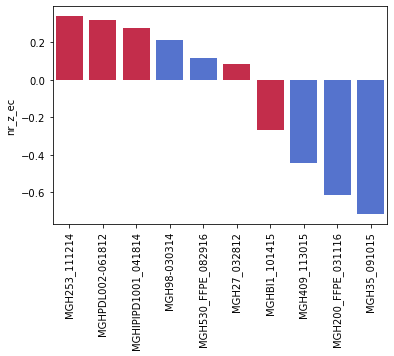

In [38]:
tmp = TEC_zsum_result[TEC_zsum_result['time'] == 'PRE'].sort_values(by='nr_z_ec', ascending=False)
sns.barplot(x=tmp.index, y='nr_z_ec', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'MGH27_070213'),
  Text(1, 0, 'MGHIPIPD1001_070215-1'),
  Text(2, 0, 'MGHIPIPD1001_092414'),
  Text(3, 0, 'MGH530_FFPE_091916'),
  Text(4, 0, 'MGH253_070616'),
  Text(5, 0, 'MGH99_041914'),
  Text(6, 0, 'MGHPDL002-080112'),
  Text(7, 0, 'MGHIPIPD1001_070215-2'),
  Text(8, 0, 'MGH51-041814'),
  Text(9, 0, 'MGHIPIPD1001_070715-2'),
  Text(10, 0, 'MGH51-081413'),
  Text(11, 0, 'MGHIPIPD1001_070715-3'),
  Text(12, 0, 'MGHIPIPD1001_070715-1'),
  Text(13, 0, 'MGH200_FFPE_072716'),
  Text(14, 0, 'MGH98-051514'),
  Text(15, 0, 'MGH530_FFPE_032417'),
  Text(16, 0, '148-12-13-14_S10')])

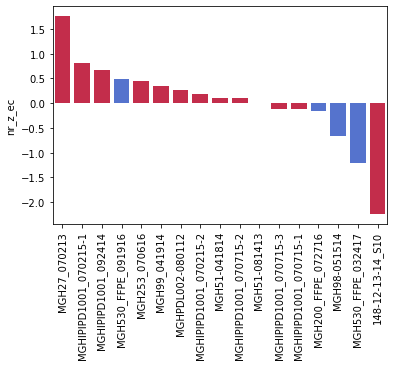

In [58]:
tmp = TEC_zsum_result[TEC_zsum_result['time'] == 'POST'].sort_values(by='nr_z_ec', ascending=False)
sns.barplot(x=tmp.index, y='nr_z_ec', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MGHPDL002-061812'),
  Text(1, 0, 'MGH409_113015'),
  Text(2, 0, 'MGH200_FFPE_031116'),
  Text(3, 0, 'MGHIPIPD1001_041814'),
  Text(4, 0, 'MGH35_091015'),
  Text(5, 0, 'MGH530_FFPE_082916'),
  Text(6, 0, 'MGHBI1_101415'),
  Text(7, 0, 'MGH98-030314'),
  Text(8, 0, 'MGH27_032812'),
  Text(9, 0, 'MGH253_111214')])

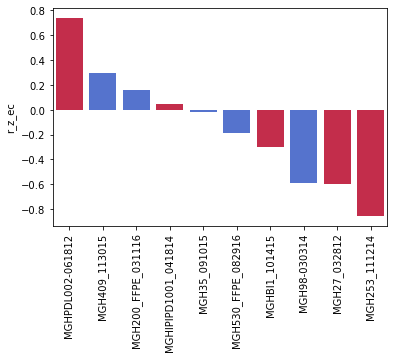

In [59]:
tmp = TEC_zsum_result[TEC_zsum_result['time'] == 'PRE'].sort_values(by='r_z_ec', ascending=False)
sns.barplot(x=tmp.index, y='r_z_ec', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'MGH27_070213'),
  Text(1, 0, 'MGH530_FFPE_091916'),
  Text(2, 0, 'MGH98-051514'),
  Text(3, 0, 'MGHPDL002-080112'),
  Text(4, 0, 'MGH51-041814'),
  Text(5, 0, 'MGH51-081413'),
  Text(6, 0, 'MGHIPIPD1001_070715-1'),
  Text(7, 0, 'MGHIPIPD1001_070215-2'),
  Text(8, 0, 'MGHIPIPD1001_092414'),
  Text(9, 0, 'MGH99_041914'),
  Text(10, 0, 'MGHIPIPD1001_070715-3'),
  Text(11, 0, 'MGHIPIPD1001_070215-1'),
  Text(12, 0, 'MGH200_FFPE_072716'),
  Text(13, 0, 'MGHIPIPD1001_070715-2'),
  Text(14, 0, 'MGH253_070616'),
  Text(15, 0, 'MGH530_FFPE_032417'),
  Text(16, 0, '148-12-13-14_S10')])

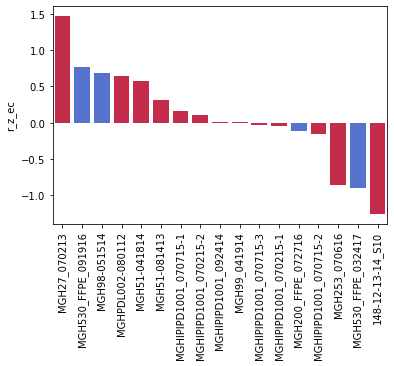

In [60]:
tmp = TEC_zsum_result[TEC_zsum_result['time'] == 'POST'].sort_values(by='r_z_ec', ascending=False)
sns.barplot(x=tmp.index, y='r_z_ec', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)

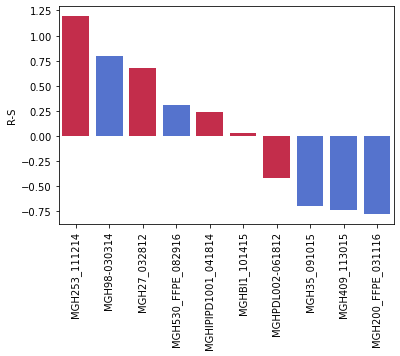

In [75]:
tmp = TEC_zsum_result[TEC_zsum_result['time'] == 'PRE'].sort_values(by='R-S', ascending=False)
sns.barplot(x=tmp.index, y='R-S', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.savefig(auc_home + 'waterfall_168204_Pre.pdf', transparent=True)
fig.savefig(auc_home + 'waterfall_168204_Pre.png', dpi=300, transparent=True)

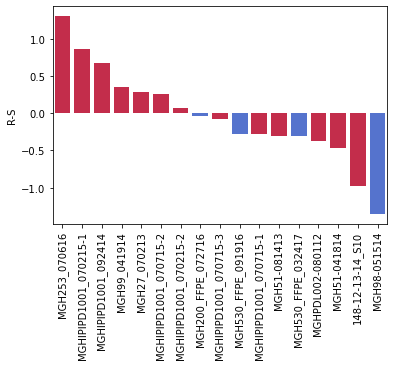

In [74]:
tmp = TEC_zsum_result[TEC_zsum_result['time'] == 'POST'].sort_values(by='R-S', ascending=False)
sns.barplot(x=tmp.index, y='R-S', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.savefig(auc_home + 'waterfall_168204_Post.pdf', transparent=True)
fig.savefig(auc_home + 'waterfall_168204_Post.png', dpi=300, transparent=True)

In [69]:
TEC_zsum_result['response_binary'] = 0
for p in TEC_zsum_result.index:
    if TEC_zsum_result.loc[p, 'response_color'] in ['crimson']:
        TEC_zsum_result.at[p, 'response_binary'] = 1

PRE
0.72
POST
0.7307692307692307


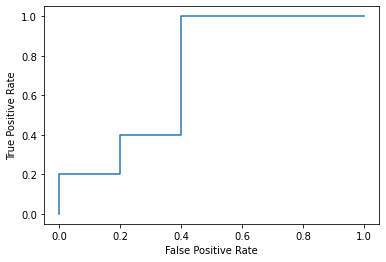

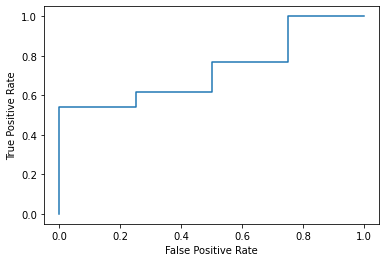

In [70]:
for t in ['PRE', 'POST']:
    print(t)
    tmp = TEC_zsum_result[TEC_zsum_result['time'] == t]
    fpr_tmp, tpr_tmp, _ = roc_curve(tmp['response_binary'], tmp['R-S'], pos_label=1)
    RocCurveDisplay(fpr=fpr_tmp, tpr=tpr_tmp).plot()
    print(auc(fpr_tmp, tpr_tmp))

PRE
0.72
POST
0.7307692307692307


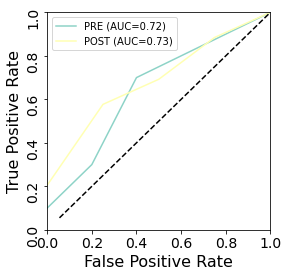

In [73]:
plt.figure(figsize=(4, 4))
sns.set_palette('Set3')
for t in ['PRE', 'POST']:
    print(t)
    tmp = TEC_zsum_result[TEC_zsum_result['time'] == t]
    fpr_tmp, tpr_tmp, _ = roc_curve(tmp['response_binary'], tmp['R-S'], pos_label=1)

    print(auc(fpr_tmp, tpr_tmp))
    g = sns.lineplot(x=fpr_tmp,
                     y=tpr_tmp,
                     ci=None,
                     label=t + ' (AUC=' + str(np.round(auc(fpr_tmp, tpr_tmp), 2)) + ')')


# add x=y
x0, x1 = g.get_xlim()
y0, y1 = g.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.plot(lims, lims, '--k')

# add labels
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.yticks(rotation=90, fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.tight_layout()
fig = plt.gcf()
fig.savefig(auc_home + 'AUC_168204.pdf', transparent=True)
fig.savefig(auc_home + 'AUC_168204.png', dpi=300, transparent=True)

<AxesSubplot:xlabel='nr_z_ec', ylabel='r_z_ec'>

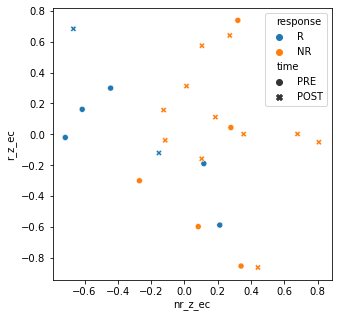

In [39]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='nr_z_ec', y='r_z_ec', hue='response', style='time', data=TEC_zsum_result[abs(TEC_zsum_result['patient_mean']) < .6])

<AxesSubplot:xlabel='nr_z_ec', ylabel='r_z_ec'>

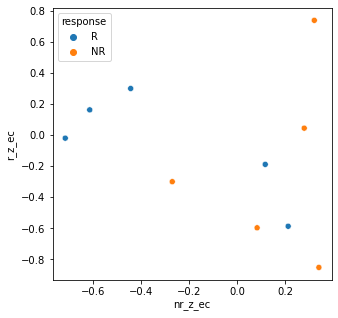

In [40]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='nr_z_ec', y='r_z_ec', hue='response', data=TEC_zsum_result[TEC_zsum_result['time'] == 'PRE'])

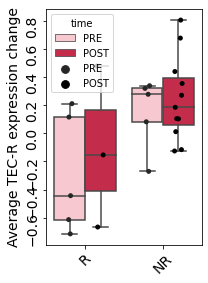

In [223]:
plt.figure(figsize=(3, 4))
sns.boxplot(x='response', y='nr_z_ec', hue='time',
            palette={'PRE': 'pink', 'POST': 'crimson'},
            data=TEC_zsum_result[abs(TEC_zsum_result['patient_mean']) < 1])
sns.stripplot(x='response', y='nr_z_ec', hue='time', dodge=True, color='k',
              data=TEC_zsum_result[abs(TEC_zsum_result['patient_mean']) < 1])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel('')
plt.yticks(rotation=90, fontsize=14)
plt.ylabel('Average TEC-R expression change', fontsize=14)
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + '/validation/GSE168204_TEC-R_ave.png', transparent=True, dpi=300)
fig.savefig(panel_home + '/validation/GSE168204_TEC-R_ave.pdf', transparent=True)

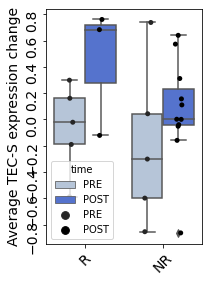

In [222]:
plt.figure(figsize=(3, 4))
sns.boxplot(x='response', y='r_z_ec', hue='time',
            palette={'PRE': 'lightsteelblue', 'POST': 'royalblue'},
            data=TEC_zsum_result[abs(TEC_zsum_result['patient_mean']) < 1])
sns.stripplot(x='response', y='r_z_ec', hue='time', dodge=True, color='k',
              data=TEC_zsum_result[abs(TEC_zsum_result['patient_mean']) < 1])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel('')
plt.yticks(rotation=90, fontsize=14)
plt.ylabel('Average TEC-S expression change', fontsize=14)
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + '/validation/GSE168204_TEC-S_ave.png', transparent=True, dpi=300)
fig.savefig(panel_home + '/validation/GSE168204_TEC-S_ave.pdf', transparent=True)

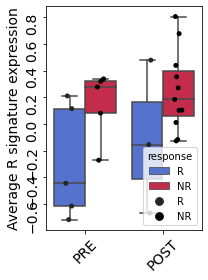

In [57]:
plt.figure(figsize=(3, 4))
sns.boxplot(x='time', y='nr_z_ec', hue='response',
            palette={'R': 'royalblue', 'NR': 'crimson'},
            data=TEC_zsum_result[abs(TEC_zsum_result['patient_mean']) < 1])
sns.stripplot(x='time', y='nr_z_ec', hue='response', dodge=True, color='k',
              data=TEC_zsum_result[abs(TEC_zsum_result['patient_mean']) < 1])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel('')
plt.yticks(rotation=90, fontsize=14)
plt.ylabel('Average R signature expression', fontsize=14)
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + '/validation/GSE168204_TEC-R_ave_by_time.png', transparent=True, dpi=300)
fig.savefig(panel_home + '/validation/GSE168204_TEC-R_ave_by_time.pdf', transparent=True)

In [55]:
for t in TEC_zsum_result['time'].unique():
    tmp_t = TEC_zsum_result[TEC_zsum_result['time'] == t]
    tmp_r = tmp_t[tmp_t['response'] == 'R']
    tmp_nr = tmp_t[tmp_t['response'] == 'NR']
    
    print(t)
    
    # R sig
    print('R sig')
    print(stats.ranksums(tmp_r['nr_z_ec'], tmp_nr['nr_z_ec']))
    
    # S sig
    print('S sig')
    print(stats.ranksums(tmp_r['r_z_ec'], tmp_nr['r_z_ec']))

PRE
R sig
RanksumsResult(statistic=-1.775592090748118, pvalue=0.07580017458236125)
S sig
RanksumsResult(statistic=0.731126155013931, pvalue=0.46470209994046485)
POST
R sig
RanksumsResult(statistic=-1.4719601443879744, pvalue=0.14103164052071643)
S sig
RanksumsResult(statistic=0.22645540682891913, pvalue=0.8208472385419284)


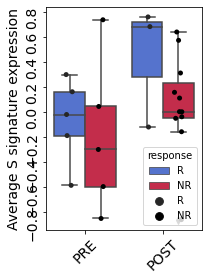

In [58]:
plt.figure(figsize=(3, 4))
sns.boxplot(x='time', y='r_z_ec', hue='response',
            palette={'R': 'royalblue', 'NR': 'crimson'},
            data=TEC_zsum_result[abs(TEC_zsum_result['patient_mean']) < 1])
sns.stripplot(x='time', y='r_z_ec', hue='response', dodge=True, color='k',
              data=TEC_zsum_result[abs(TEC_zsum_result['patient_mean']) < 1])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel('')
plt.yticks(rotation=90, fontsize=14)
plt.ylabel('Average S signature expression', fontsize=14)
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + '/validation/GSE168204_TEC-S_ave_by_time.png', transparent=True, dpi=300)
fig.savefig(panel_home + '/validation/GSE168204_TEC-S_ave_by_time.pdf', transparent=True)

In [213]:
for r in TEC_zsum_result['time'].unique():
    print(r)
    tmp_r = TEC_zsum_result[TEC_zsum_result['time'] == r]
    tmp_r = tmp_r[abs(tmp_r['patient_mean']) < 1]
    print('TEC-R')
    print(stats.ttest_ind(tmp_r[tmp_r['response'] == 'NR']['nr_z_ec'], tmp_r[tmp_r['response'] == 'R']['nr_z_ec']))
    print('TEC-S')
    print(stats.ttest_ind(tmp_r[tmp_r['response'] == 'NR']['r_z_ec'], tmp_r[tmp_r['response'] == 'R']['r_z_ec']))

PRE
TEC-R
Ttest_indResult(statistic=1.9743206133269389, pvalue=0.08378178566060757)
TEC-S
Ttest_indResult(statistic=-0.3991937464064902, pvalue=0.7001949988511815)
POST
TEC-R
Ttest_indResult(statistic=1.5258193942328249, pvalue=0.15297039968077106)
TEC-S
Ttest_indResult(statistic=-1.3966437673554537, pvalue=0.18781617407300666)


In [215]:
for r in TEC_zsum_result['response'].unique():
    print(r)
    tmp_r = TEC_zsum_result[TEC_zsum_result['response'] == r]
    tmp_r = tmp_r[abs(tmp_r['patient_mean']) < 1]
    print('TEC-R')
    print(stats.ttest_ind(tmp_r[tmp_r['time'] == 'POST']['nr_z_ec'], tmp_r[tmp_r['time'] == 'PRE']['nr_z_ec']))
    print('TEC-S')
    print(stats.ttest_ind(tmp_r[tmp_r['time'] == 'POST']['r_z_ec'], tmp_r[tmp_r['time'] == 'PRE']['r_z_ec']))

R
TEC-R
Ttest_indResult(statistic=0.5003820586654967, pvalue=0.6346265113330255)
TEC-S
Ttest_indResult(statistic=1.7484624114857166, pvalue=0.13096879512110834)
NR
TEC-R
Ttest_indResult(statistic=0.6192509318544558, pvalue=0.5456970230320475)
TEC-S
Ttest_indResult(statistic=1.0040722126257362, pvalue=0.33238343457049846)


In [218]:
for r in TEC_zsum_result['response'].unique():
    print(r)
    tmp_r = TEC_zsum_result[TEC_zsum_result['response'] == r]
    tmp_r = tmp_r[abs(tmp_r['patient_mean']) < 1]
    print('TEC-R')
    print(tmp_r[tmp_r['time'] == 'POST']['nr_z_ec'].mean() / tmp_r[tmp_r['time'] == 'PRE']['nr_z_ec'].mean())
    print('TEC-S')
    print(tmp_r[tmp_r['time'] == 'POST']['r_z_ec'].mean() / tmp_r[tmp_r['time'] == 'PRE']['r_z_ec'].mean())

R
TEC-R
0.3922512648988913
TEC-S
-6.496548780408191
NR
TEC-R
1.6466157963128571
TEC-S
-0.3189874039800749


## 1.1 Visualize the NREC and REC profiles

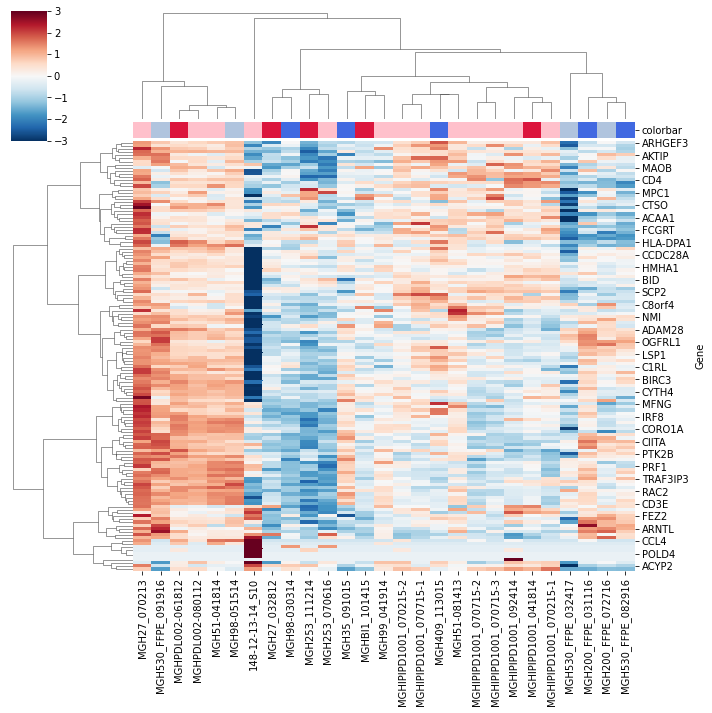

In [13]:
# REC
sns.clustermap(log2exp2_168204_REC[log2exp2_168204_REC > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])

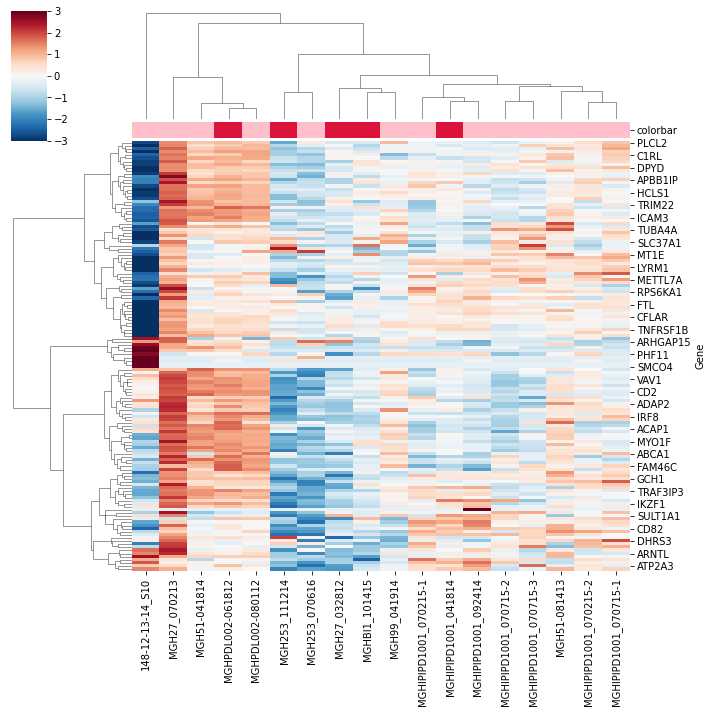

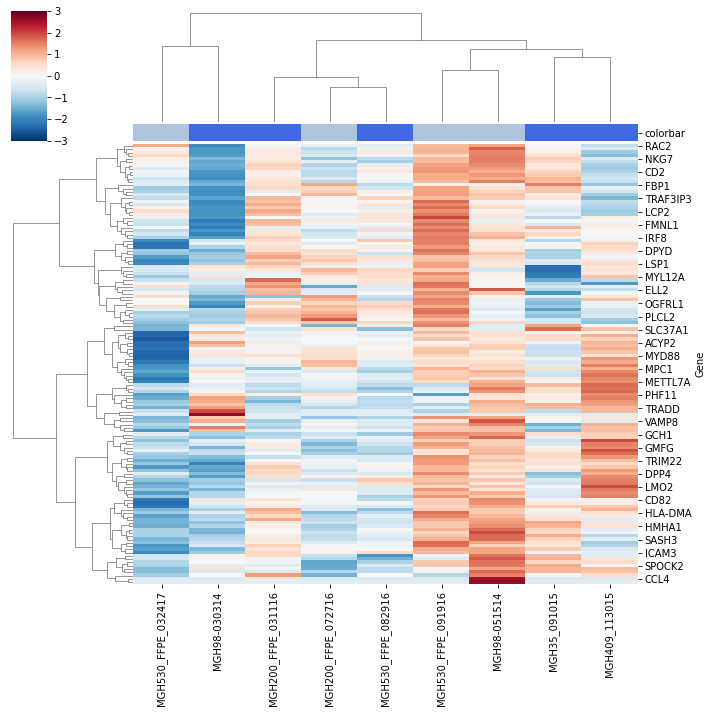

In [14]:
# REC in NR and R
tmp_NR = info_168204[info_168204['response'] == 'NR'].index
tmp_R = info_168204[info_168204['response'] == 'R'].index

sns.clustermap(log2exp2_168204_REC[tmp_NR][log2exp2_168204_REC[tmp_NR] > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

sns.clustermap(log2exp2_168204_REC[tmp_R][log2exp2_168204_REC[tmp_R] > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


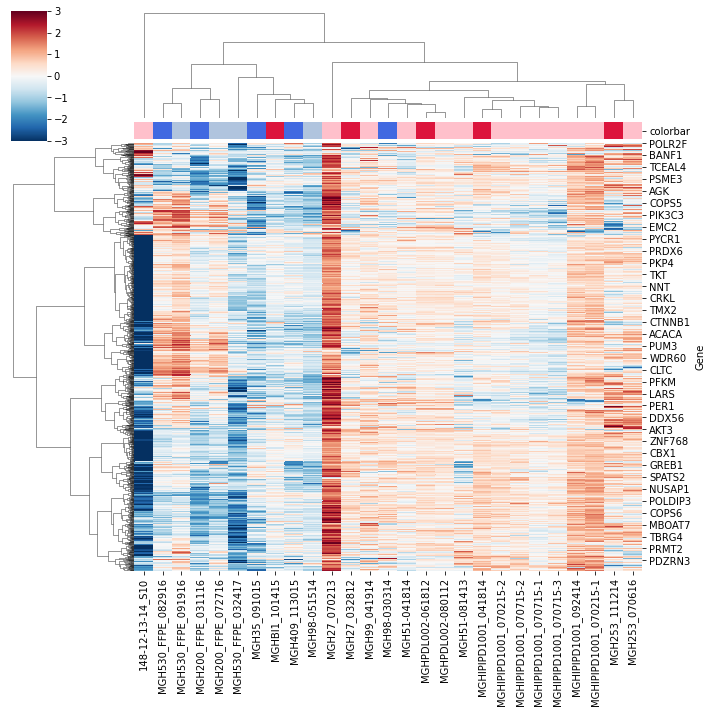

In [15]:
# NREC
sns.clustermap(log2exp2_168204_NREC[log2exp2_168204_NREC > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])

/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


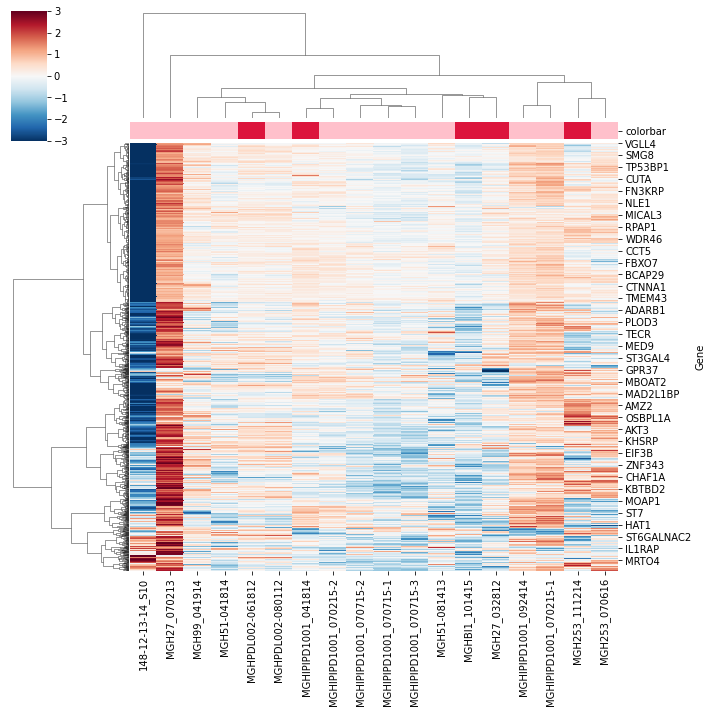

/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


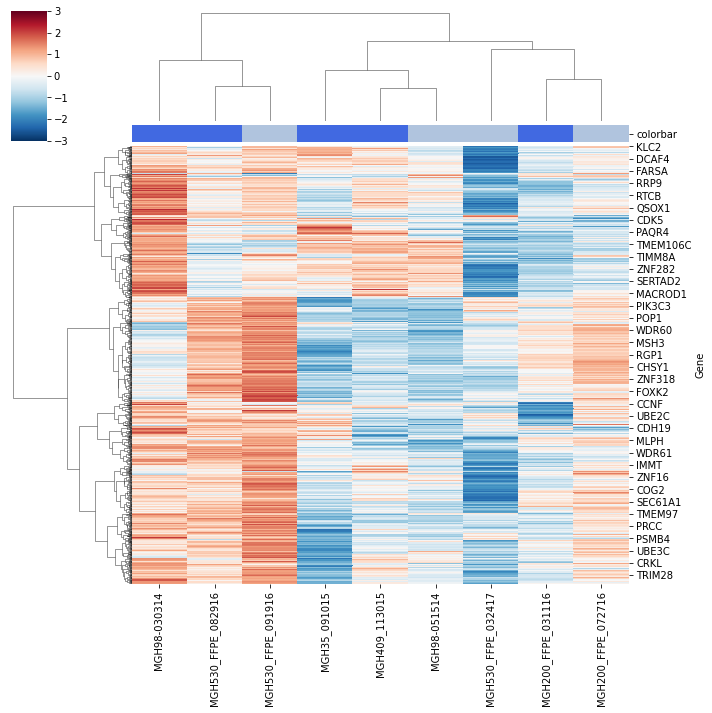

In [16]:
# NREC in NR and R
sns.clustermap(log2exp2_168204_NREC[tmp_NR][log2exp2_168204_NREC[tmp_NR] > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

sns.clustermap(log2exp2_168204_NREC[tmp_R][log2exp2_168204_NREC[tmp_R] > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

## 1.2 Calculate the foldchange

In [26]:
# REC in NR and R
tmp_NR = info_168204[info_168204['response'] == 'NR']
tmp_R = info_168204[info_168204['response'] == 'R']

In [27]:
log2fc_168204 = df(log2exp2_168204[tmp_NR[tmp_NR['time'] == 'POST'].index].mean(axis=1) - log2exp2_168204[tmp_NR[tmp_NR['time'] == 'PRE'].index].mean(axis=1)).rename(columns={0: 'NR'})
log2fc_168204['R'] = log2exp2_168204[tmp_R[tmp_R['time'] == 'POST'].index].mean(axis=1) - log2exp2_168204[tmp_R[tmp_R['time'] == 'PRE'].index].mean(axis=1)

In [28]:
log2fc_168204

NR         R
Gene                      
A2M     0.449240  0.150480
A4GALT  0.448707 -1.893086
AAAS   -0.239758 -0.913536
AACS    0.690160  0.232779
AADAC   3.343114  1.751755
...          ...       ...
ZWINT  -0.053841 -0.970780
ZXDC   -0.244041  0.325957
ZYX    -1.455946  0.459750
ZZEF1  -0.309716  0.145519
ZZZ3   -0.472349 -0.027322

[10050 rows x 2 columns]

In [29]:
log2mean_168204 = df(index=log2exp2_168204.index, columns=['NR_PRE', 'NR_POST', 'R_PRE', 'R_POST'])
log2mean_168204['NR_PRE'] = log2exp2_168204[tmp_NR[tmp_NR['time'] == 'PRE'].index].mean(axis=1)
log2mean_168204['NR_POST'] = log2exp2_168204[tmp_NR[tmp_NR['time'] == 'POST'].index].mean(axis=1)
log2mean_168204['R_PRE'] = log2exp2_168204[tmp_R[tmp_R['time'] == 'PRE'].index].mean(axis=1)
log2mean_168204['R_POST'] = log2exp2_168204[tmp_R[tmp_R['time'] == 'POST'].index].mean(axis=1)

In [30]:
log2mean_168204

NR_PRE    NR_POST      R_PRE     R_POST
Gene                                              
A2M     13.027285  13.476525  13.725186  13.875666
A4GALT   7.361300   7.810007   8.533980   6.640893
AAAS     8.494124   8.254366   8.103138   7.189602
AACS     9.015874   9.706034   8.011986   8.244765
AADAC    0.400000   3.743114   3.317180   5.068936
...           ...        ...        ...        ...
ZWINT    4.425786   4.371945   2.068859   1.098079
ZXDC     8.990679   8.746638   9.394959   9.720917
ZYX     11.927111  10.471165  11.416826  11.876576
ZZEF1   10.566987  10.257271  11.333125  11.478644
ZZZ3    10.068792   9.596444  10.282563  10.255241

[10050 rows x 4 columns]

In [24]:
log2mean_168204.to_csv(data_home + '/GSE168204/log2mean_168204.csv')

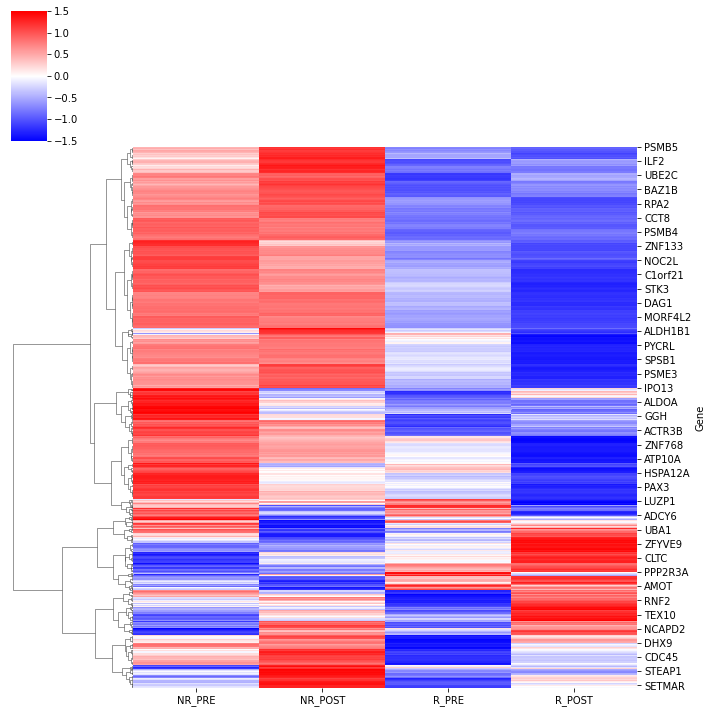

In [31]:
sns.clustermap(log2mean_168204[log2mean_168204.index.isin(gene_sets['NREC_profile'])],
               col_cluster=False, vmin=-1.5, vmax=1.5,
               z_score=0, cmap='bwr', method='ward')

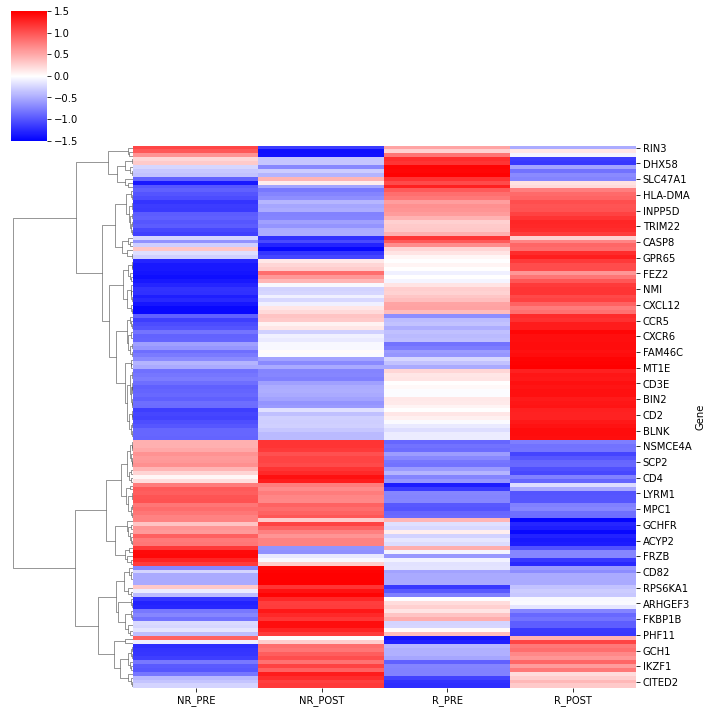

In [32]:
sns.clustermap(log2mean_168204[log2mean_168204.index.isin(gene_sets['REC_profile'])],
               col_cluster=False, vmin=-1.5, vmax=1.5,
               z_score=0, cmap='bwr', method='ward')

In [33]:
log2fc_168204

NR         R
Gene                      
A2M     0.449240  0.150480
A4GALT  0.448707 -1.893086
AAAS   -0.239758 -0.913536
AACS    0.690160  0.232779
AADAC   3.343114  1.751755
...          ...       ...
ZWINT  -0.053841 -0.970780
ZXDC   -0.244041  0.325957
ZYX    -1.455946  0.459750
ZZEF1  -0.309716  0.145519
ZZZ3   -0.472349 -0.027322

[10050 rows x 2 columns]

<AxesSubplot:xlabel='NR', ylabel='R'>

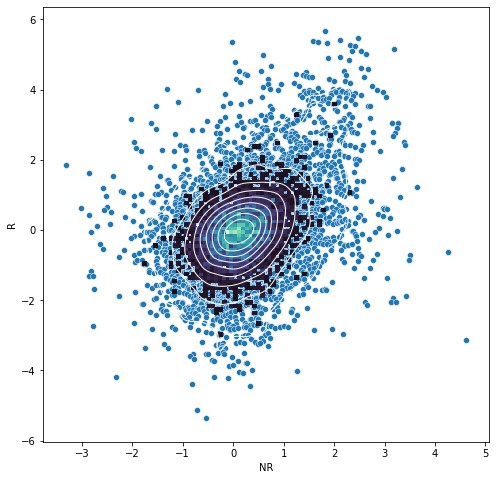

In [76]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='NR', y='R', data=log2fc_168204)
sns.histplot(x='NR', y='R', data=log2fc_168204, cmap='mako', pthresh=.1)
sns.kdeplot(x='NR', y='R', data=log2fc_168204, color='w', linewidths=1)

In [77]:
log2fc_168204.loc['IFNGR1', :]

NR             0.781975
R              0.292414
profile    Unclassified
NR-R           0.489561
Name: IFNGR1, dtype: object

In [78]:
log2fc_168204.loc['HLA-A', :]

NR              0.78893
R              -1.39874
profile    Unclassified
NR-R            2.18767
Name: HLA-A, dtype: object

In [79]:
log2fc_168204.loc['HLA-B', :]

NR             0.696329
R              -2.72367
profile    Unclassified
NR-R               3.42
Name: HLA-B, dtype: object

In [80]:
log2fc_168204.loc['PRF1', :]

NR         0.539857
R           2.02774
profile         REC
NR-R       -1.48788
Name: PRF1, dtype: object

In [81]:
log2fc_168204.loc['CD8A', :]

NR         0.594821
R           1.79919
profile         REC
NR-R       -1.20437
Name: CD8A, dtype: object

In [83]:
log2fc_168204.loc['JAK3', :]

NR        -0.157081
R           1.18616
profile         REC
NR-R       -1.34324
Name: JAK3, dtype: object

In [51]:
log2fc_168204.loc['PAK4', :]

NR         0.444829
R          0.141946
profile        NREC
NR-R       0.302883
Name: PAK4, dtype: object

In [65]:
log2fc_168204.loc['B2M', :]

NR             0.771169
R             -0.911471
profile    Unclassified
NR-R            1.68264
Name: B2M, dtype: object

In [66]:
log2fc_168204.loc['TAP1', :]

NR             0.681737
R            -0.0190272
profile    Unclassified
NR-R           0.700765
Name: TAP1, dtype: object

In [87]:
log2fc_168204.loc['CCR5', :]

NR          0.727044
R            0.80841
profile          REC
NR-R      -0.0813665
Name: CCR5, dtype: object

In [84]:
log2fc_168204.loc['CXCL10', :]

NR            0.0333586
R              0.785035
profile    Unclassified
NR-R          -0.751676
Name: CXCL10, dtype: object

In [85]:
log2fc_168204.loc['CXCL3', :]

NR            -0.086657
R             -0.842849
profile    Unclassified
NR-R           0.756192
Name: CXCL3, dtype: object

In [86]:
log2fc_168204.loc['BRCA1', :]

NR         0.566221
R           0.27113
profile        NREC
NR-R       0.295091
Name: BRCA1, dtype: object

<AxesSubplot:xlabel='NR-R', ylabel='profile'>

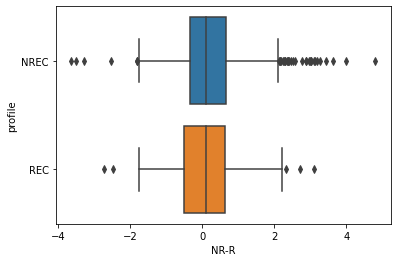

In [34]:
# add profile info
log2fc_168204['profile'] = 'Unclassified'
for g in gene_sets['REC_profile']:
    try:
        log2fc_168204.at[g, 'profile'] = 'REC'
    except KeyError:
        pass
for g in gene_sets['NREC_profile']:
    try:
        log2fc_168204.at[g, 'profile'] = 'NREC'
    except KeyError:
        pass  

log2fc_168204['profile'].unique()

log2fc_168204['NR-R'] = log2fc_168204['NR'] - log2fc_168204['R']

log2fc_168204 = log2fc_168204.dropna(axis=0, how='any')

sns.boxplot(x='NR-R', y='profile', data=log2fc_168204[log2fc_168204['profile'] != 'Unclassified'])

<AxesSubplot:xlabel='NR-R', ylabel='profile'>

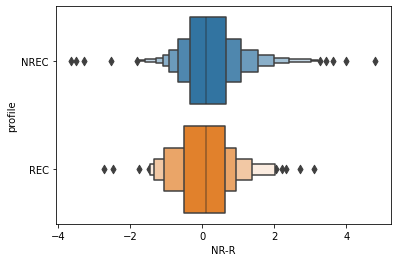

In [35]:
sns.boxenplot(x='NR-R', y='profile', data=log2fc_168204[log2fc_168204['profile'] != 'Unclassified'])

<AxesSubplot:xlabel='NR-R', ylabel='profile'>

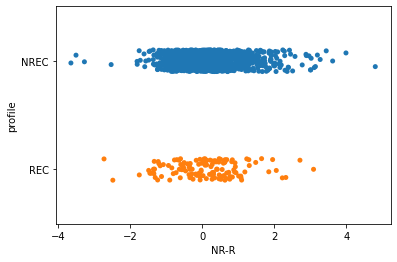

In [36]:
sns.stripplot(x='NR-R', y='profile', data=log2fc_168204[log2fc_168204['profile'] != 'Unclassified'])

<AxesSubplot:xlabel='NR-R', ylabel='profile'>

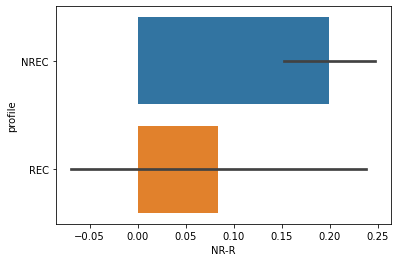

In [37]:
sns.barplot(x='NR-R', y='profile', data=log2fc_168204[log2fc_168204['profile'] != 'Unclassified'])

In [38]:
# take signs
log2fc_168204['DETIEC_direction'] = np.sign(log2fc_168204['NR-R']) * 1

<ipython-input-38-14fcfc7ee479>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log2fc_168204['DETIEC_direction'] = np.sign(log2fc_168204['NR-R']) * 1


In [39]:
log2fc_168204

NR         R       profile      NR-R  DETIEC_direction
Gene                                                                
A2M     0.449240  0.150480  Unclassified  0.298760               1.0
A4GALT  0.448707 -1.893086  Unclassified  2.341793               1.0
AAAS   -0.239758 -0.913536          NREC  0.673778               1.0
AACS    0.690160  0.232779          NREC  0.457381               1.0
AADAC   3.343114  1.751755  Unclassified  1.591359               1.0
...          ...       ...           ...       ...               ...
ZWINT  -0.053841 -0.970780  Unclassified  0.916939               1.0
ZXDC   -0.244041  0.325957  Unclassified -0.569999              -1.0
ZYX    -1.455946  0.459750  Unclassified -1.915697              -1.0
ZZEF1  -0.309716  0.145519  Unclassified -0.455235              -1.0
ZZZ3   -0.472349 -0.027322  Unclassified -0.445026              -1.0

[10050 rows x 5 columns]

In [40]:
pd.crosstab(log2fc_168204['profile'], log2fc_168204['DETIEC_direction'])

DETIEC_direction  -1.0   0.0   1.0
profile                           
NREC               504     0   680
REC                 62     0    76
Unclassified      3526     1  5201

In [41]:
log2fc_168204['profile'].value_counts()

Unclassified    8728
NREC            1184
REC              138
Name: profile, dtype: int64

<AxesSubplot:xlabel='NR-R', ylabel='Density'>

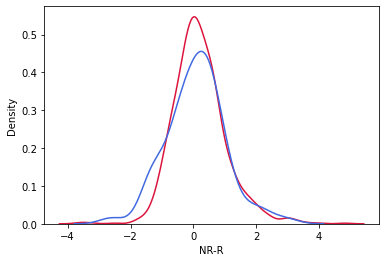

In [38]:
sns.kdeplot(x='NR-R',
            data=log2fc_168204[log2fc_168204['profile'] == 'NREC'],
            c='crimson')

sns.kdeplot(x='NR-R',
            data=log2fc_168204[log2fc_168204['profile'] == 'REC'],
            c='royalblue')

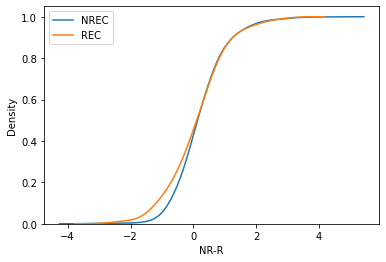

In [40]:
sns.kdeplot(x='NR-R',
            data=log2fc_168204[log2fc_168204['profile'] == 'NREC'],
            label='NREC',
            cumulative=True)
sns.kdeplot(x='NR-R',
            data=log2fc_168204[log2fc_168204['profile'] == 'REC'],
            label='REC',
            cumulative=True)
plt.legend()

In [43]:
log2fc_168204 = log2fc_168204.sort_values(by='NR-R', ascending=True)

<AxesSubplot:ylabel='Gene'>

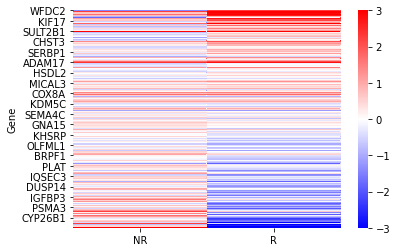

In [44]:
sns.heatmap(log2fc_168204[['NR', 'R']], cmap='bwr', vmin=-3, vmax=3)

In [29]:
log2fc_168204['NR-R']

Gene
WFDC2    -5.361054
KCNIP1   -5.336369
FABP7    -5.178494
SPP1     -5.148911
KIF5A    -5.054113
            ...   
CIDEC     5.181199
HOXA11    5.264702
PLIN1     5.287887
FABP4     5.299971
ADIPOQ    7.744716
Name: NR-R, Length: 10059, dtype: float64

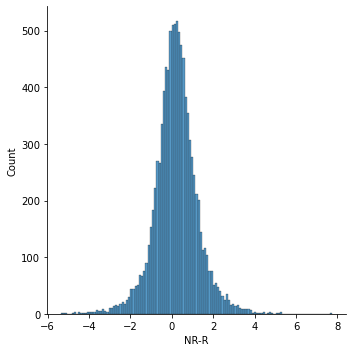

In [52]:
sns.displot(log2fc_168204['NR-R'])

In [53]:
log2fc_168204['NR-R'][:1000]

Gene
WFDC2    -5.361054
KCNIP1   -5.336369
FABP7    -5.178494
SPP1     -5.148911
KIF5A    -5.054113
            ...   
PDE7B    -0.958532
TPM2     -0.958481
SURF2    -0.958159
ZMYM2    -0.957392
FAM35A   -0.956809
Name: NR-R, Length: 1000, dtype: float64

In [54]:
log2fc_168204['NR-R'][-1000:]

Gene
APOL6     1.398249
SUSD6     1.399154
MOSPD2    1.399409
TMEM9B    1.400198
AKT3      1.400209
            ...   
CIDEC     5.181199
HOXA11    5.264702
PLIN1     5.287887
FABP4     5.299971
ADIPOQ    7.744716
Name: NR-R, Length: 1000, dtype: float64

In [62]:
# enrichment test: nrec
enrichr_defc_168204_up = gp.enrichr(gene_list=list(log2fc_168204['NR-R'][-1000:].index),
                                   gene_sets=['MSigDB_Hallmark_2020'],
                                   organism='Human',
                                   description='sig_defc_168204_up_updated',
                                   outdir='GSEA/sig_defc_168204_up_updated',
                                   cutoff=0.5)

# enrichment test: rec
enrichr_defc_168204_down = gp.enrichr(gene_list=list(log2fc_168204['NR-R'][:1000].index),
                                   gene_sets=['MSigDB_Hallmark_2020'],
                                   organism='Human',
                                   description='sig_defc_168204_down_updated',
                                   outdir='GSEA/sig_defc_168204_down_updated',
                                   cutoff=0.5)

In [63]:
enrichr_defc_168204_up.results.head(20)

Gene_set                               Term Overlap   P-value  \
0   MSigDB_Hallmark_2020          Interferon Gamma Response  27/200  0.000003   
1   MSigDB_Hallmark_2020                       Adipogenesis  25/200  0.000023   
2   MSigDB_Hallmark_2020          Interferon Alpha Response   16/97  0.000024   
3   MSigDB_Hallmark_2020                         Myogenesis  24/200  0.000065   
4   MSigDB_Hallmark_2020              Fatty Acid Metabolism  20/158  0.000124   
5   MSigDB_Hallmark_2020                     UV Response Up  20/158  0.000124   
6   MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  22/200  0.000447   
7   MSigDB_Hallmark_2020                        Pperoxisome  14/104  0.000666   
8   MSigDB_Hallmark_2020                  KRAS Signaling Up  21/200  0.001090   
9   MSigDB_Hallmark_2020          Unfolded Protein Response  14/113  0.001517   
10  MSigDB_Hallmark_2020                        p53 Pathway  20/200  0.002530   
11  MSigDB_Hallmark_2020                Pancreas Beta Cells    7/40  0.003354   
12  MSigDB_Hallmark_2020                  Protein Secretion   11/96  0.008396   
13  MSigDB_Hallmark_2020                    heme Metabolism  18/200  0.011694   
14  MSigDB_Hallmark_2020                     UV Response Dn  14/144  0.013200   
15  MSigDB_Hallmark_2020                         DNA Repair  14/150  0.018292   
16  MSigDB_Hallmark_2020                    Notch Signaling    5/32  0.020257   
17  MSigDB_Hallmark_2020             Estrogen Response Late  17/200  0.023198   
18  MSigDB_Hallmark_2020              Xenobiotic Metabolism  17/200  0.023198   
19  MSigDB_Hallmark_2020                  Androgen Response  10/100  0.027849   

    Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0           0.000129            0                     0    3.019854   
1           0.000394            0                     0    2.758242   
2           0.000394            0                     0    3.797852   
3           0.000814            0                     0    2.630030   
4           0.001033            0                     0    2.789411   
5           0.001033            0                     0    2.789411   
6           0.003190            0                     0    2.378645   
7           0.004161            0                     0    2.983322   
8           0.006053            0                     0    2.255414   
9           0.007585            0                     0    2.710820   
10          0.011501            0                     0    2.133787   
11          0.013975            0                     0    4.051665   
12          0.032292            0                     0    2.475049   
13          0.041763            0                     0    1.895235   
14          0.044000            0                     0    2.061008   
15          0.057162            0                     0    1.969455   
16          0.059580            0                     0    3.531174   
17          0.061047            0                     0    1.778258   
18          0.061047            0                     0    1.778258   
19          0.069624            0                     0    2.122334   

    Combined Score                                              Genes  
0        38.849257  IFI35;USP18;IFIT3;IFI44L;IFIT2;CASP7;APOL6;TRI...  
1        29.433956  ITIH5;SCARB1;RETSAT;PTGER3;UQCR11;ADIPOR2;LIPE...  
2        40.455104  RSAD2;IL15;GMPR;IFI35;USP18;IFIT3;IFI44L;IFIT2...  
3        25.353156  EIF4A2;CFD;VIPR1;CTF1;ACTN2;GPX3;FST;LDB3;FGF2...  
4        25.092155  AOC3;IDI1;RETSAT;HPGD;CIDEA;AQP7;G0S2;FMO1;SDH...  
5        25.092155  CDKN1C;GPX3;SHOX2;RAB27A;FMO1;HSPA2;HLA-F;MAPK...  
6        18.348576  LRRC15;ECM1;PCOLCE2;IL15;WNT5A;CAPG;THY1;FSTL1...  
7        21.821415  IDI1;ABCD2;RETSAT;SEMA3C;PEX11A;ABCB4;VPS4B;SI...  
8        15.386447  ERO1A;PLVAP;MMD;GABRA3;CIDEA;G0S2;HOXD11;TFPI;...  
9        17.595841  EIF4A2;ERO1A;IMP3;EIF4A3;LSM1;CXXC1;SLC1A4;LSM...  
10       12.758949  CEBPA;RETS

In [64]:
enrichr_defc_168204_down.results.head(20)

Gene_set                               Term Overlap  \
0   MSigDB_Hallmark_2020             Estrogen Response Late  38/200   
1   MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  37/200   
2   MSigDB_Hallmark_2020            Estrogen Response Early  35/200   
3   MSigDB_Hallmark_2020      TNF-alpha Signaling via NF-kB  31/200   
4   MSigDB_Hallmark_2020                  KRAS Signaling Up  31/200   
5   MSigDB_Hallmark_2020                    Apical Junction  29/200   
6   MSigDB_Hallmark_2020                         Glycolysis  29/200   
7   MSigDB_Hallmark_2020                  KRAS Signaling Dn  29/200   
8   MSigDB_Hallmark_2020              Inflammatory Response  28/200   
9   MSigDB_Hallmark_2020                         Complement  27/200   
10  MSigDB_Hallmark_2020                       Angiogenesis   10/36   
11  MSigDB_Hallmark_2020                            Hypoxia  26/200   
12  MSigDB_Hallmark_2020                     UV Response Dn  19/144   
13  MSigDB_Hallmark_2020                         Myogenesis  23/200   
14  MSigDB_Hallmark_2020                Allograft Rejection  23/200   
15  MSigDB_Hallmark_2020                        Coagulation  17/138   
16  MSigDB_Hallmark_2020                Pancreas Beta Cells    8/40   
17  MSigDB_Hallmark_2020                          Apoptosis  17/161   
18  MSigDB_Hallmark_2020              Xenobiotic Metabolism  19/200   
19  MSigDB_Hallmark_2020                 Hedgehog Signaling    6/36   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   9.300010e-13      4.650005e-11            0                     0   
1   4.279265e-12      1.069816e-10            0                     0   
2   8.193084e-11      1.365514e-09            0                     0   
3   1.970185e-08      1.970185e-07            0                     0   
4   1.970185e-08      1.970185e-07            0                     0   
5   2.444042e-07      1.527526e-06            0                     0   
6   2.444042e-07      1.527526e-06            0                     0   
7   2.444042e-07      1.527526e-06            0                     0   
8   8.116047e-07      4.508915e-06            0                     0   
9   2.588028e-06      1.294014e-05            0                     0   
10  7.218935e-06      3.281334e-05            0                     0   
11  7.916330e-06      3.298471e-05            0                     0   
12  1.041540e-04      4.005922e-04            0                     0   
13  1.744917e-04      5.816390e-04            0                     0   
14  1.744917e-04      5.816390e-04            0                     0   
15  5.347281e-04      1.671025e-03            0                     0   
16  6.997872e-04      2.058198e-03            0                     0   
17  2.937011e-03      8.158363e-03            0                     0   
18  5.583957e-03      1.469462e-02            0                     0   
19  8.276695e-03      2.069174e-02            0                     0   

    Odds Ratio  Combined Score  \
0     4.593337      127.251926   
1     4.440170      116.231387   
2     4.140210       96.156989   
3     3.564713       63.247115   
4     3.564713       63.247115   
5     3.288591       50.066970   
6     3.288591       50.066970   
7     3.288591       50.066970   
8     3.153316       44.222901   
9     3.019854       38.849257   
10    7.371406       87.268628   
11    2.888173       33.926163   
12    2.924567       26.817225   
13    2.503507       21.664434   
14    2.503507       21.664434   
15    2.698292       20.328267   
16    4.780242       34.727188   
17    2.264553       13.203166   
18    2.013736       10.446976   
19    3.816901       18.299414   

                                                Genes  
0   SERPINA1;HSPB8;AREG;CELSR2;SERPINA5;ZFP36;CDH1...  
1   CXCL6;OXTR;CXCL8;SERPINE2;LAMA2;SERPINE1;TNC;T...  
2   LAD1;WWC1;HSPB8;SLC2A1;ADCY1;CELSR1;AREG;CELSR...  
3   CXCL6;SERPINE1;TNC;TNFAIP3;PTGS2;AREG;TANK;ZFP.

In [57]:
# number of NREC overlapped with NREC_168204
op_nrec_nrec_168204 = log2fc_168204['NR-R'][-1000:][log2fc_168204['NR-R'][-1000:].index.isin(gene_sets['NREC_profile'])]
op_rec_nrec_168204 = log2fc_168204['NR-R'][-1000:][log2fc_168204['NR-R'][-1000:].index.isin(gene_sets['REC_profile'])]
op_nrec_rec_168204 = log2fc_168204['NR-R'][:1000][log2fc_168204['NR-R'][:1000].index.isin(gene_sets['NREC_profile'])]
op_rec_rec_168204 = log2fc_168204['NR-R'][:1000][log2fc_168204['NR-R'][:1000].index.isin(gene_sets['REC_profile'])]

In [58]:
print(op_nrec_nrec_168204.shape, op_rec_nrec_168204.shape, op_nrec_rec_168204.shape, op_rec_rec_168204.shape)

(91,) (9,) (63,) (18,)


## 1.4 Investigate the batch effect

In [174]:
# PCA on original space
pca_168204_model = PCA(random_state=0).fit(log2exp2_168204.T)
pca_168204 = PCA(random_state=0).fit_transform(log2exp2_168204.T)

pca_168204_coord = df(columns=['PCA-1', 'PCA-2'])
for i in range(len(log2exp2_168204.columns)):
    pca_168204_coord.at[log2exp2_168204.columns[i], 'PCA-1'] = pca_168204[i][0]
    pca_168204_coord.at[log2exp2_168204.columns[i], 'PCA-2'] = pca_168204[i][1]

pca_168204_coord['response'] = info_168204['response']
pca_168204_coord['timepoint'] = info_168204['time']

<AxesSubplot:xlabel='PCA-1', ylabel='PCA-2'>

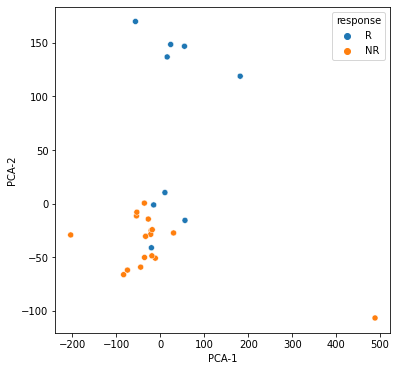

In [175]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA-1', y='PCA-2', hue='response', data=pca_168204_coord)

<AxesSubplot:xlabel='PCA-1', ylabel='PCA-2'>

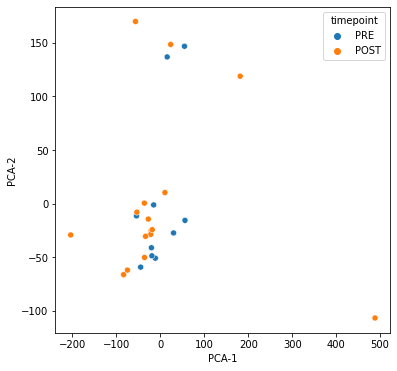

In [176]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA-1', y='PCA-2', hue='timepoint', data=pca_168204_coord)

In [177]:
# exlude PC-1 PC-2: could be the batch?
pca_168204_rm2 = []
for f in pca_168204:
    f[0] = 0
    f[1] = 0
    pca_168204_rm2.append(f)
pca_168204_new = pca_168204_model.inverse_transform(pca_168204_rm2)

In [178]:
pca_168204_new_df = df(pca_168204_new.T, index=log2exp2_168204.index, columns=log2exp2_168204.columns)

In [179]:
# PCA on space without second component
pca_168204_new = PCA(random_state=0).fit_transform(pca_168204_new_df.T)

pca_168204_new_coord = df(columns=['PCA-1', 'PCA-2'])
for i in range(len(log2exp2_168204.columns)):
    pca_168204_new_coord.at[log2exp2_168204.columns[i], 'PCA-1'] = pca_168204_new[i][0]
    pca_168204_new_coord.at[log2exp2_168204.columns[i], 'PCA-2'] = pca_168204_new[i][1]

pca_168204_new_coord['response'] = info_168204['response']
pca_168204_new_coord['timepoint'] = info_168204['time']

<AxesSubplot:xlabel='PCA-1', ylabel='PCA-2'>

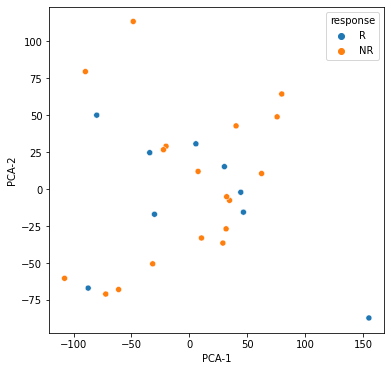

In [180]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA-1', y='PCA-2', hue='response', data=pca_168204_new_coord)

<AxesSubplot:xlabel='PCA-1', ylabel='PCA-2'>

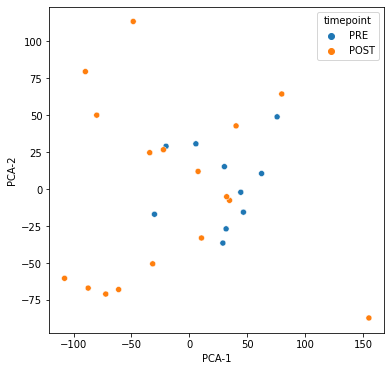

In [181]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA-1', y='PCA-2', hue='timepoint', data=pca_168204_new_coord)

In [182]:
# take the subset
pca_168204_NREC = pca_168204_new_df[pca_168204_new_df.index.isin(gene_sets['differential_foldchange_NRvR_up'])]
pca_168204_REC = pca_168204_new_df[pca_168204_new_df.index.isin(gene_sets['differential_foldchange_NRvR_down'])]

C:\Users\ywang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


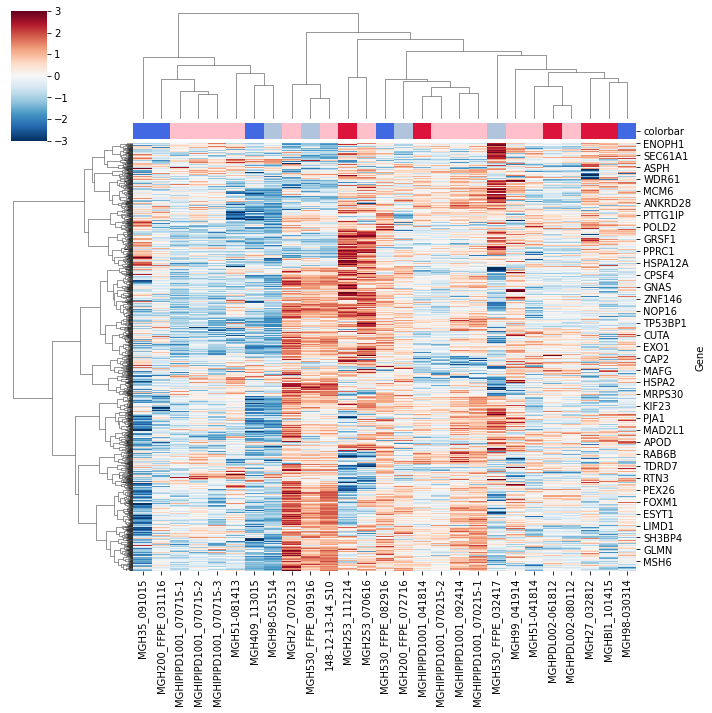

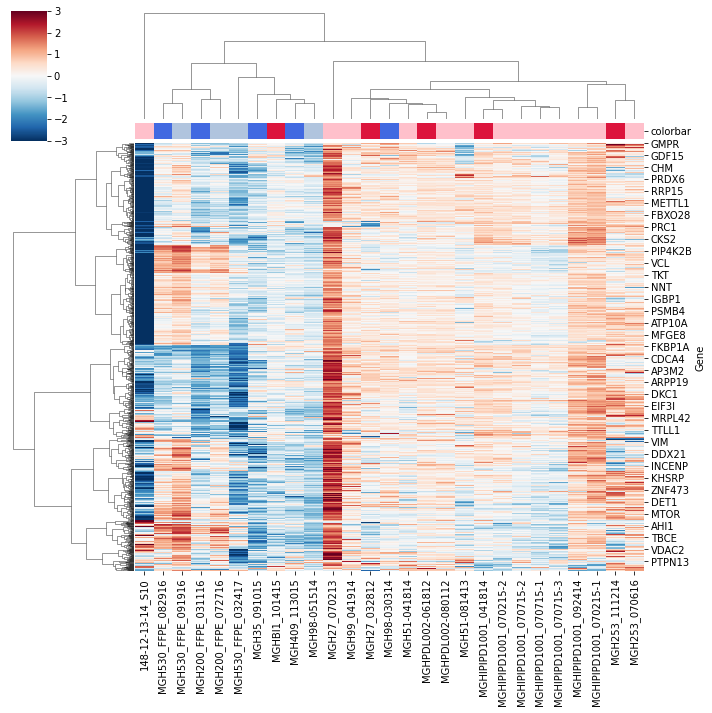

In [183]:
# NREC: normalized
sns.clustermap(pca_168204_NREC,
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

# NREC: original
sns.clustermap(log2exp2_168204_NREC,
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

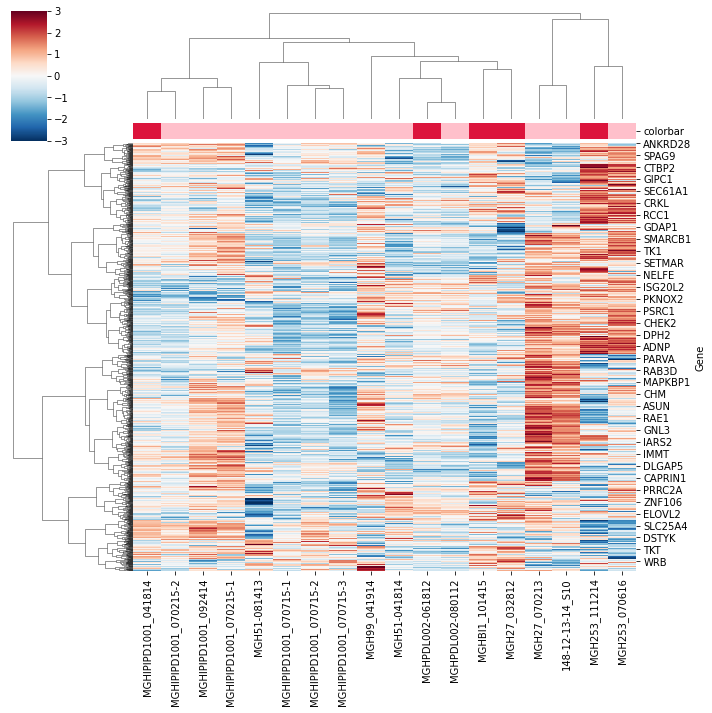

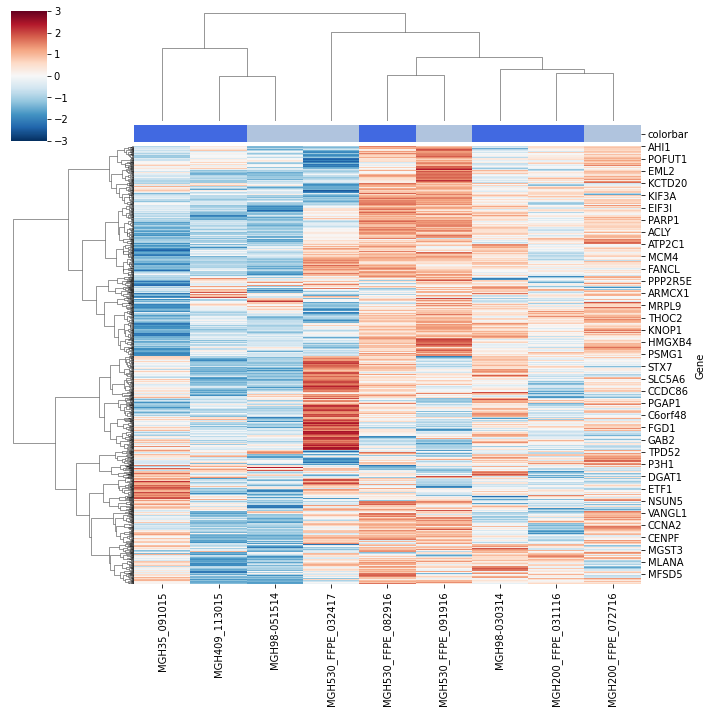

In [184]:
# NREC in NR and R
tmp_NR = info_168204[info_168204['response'] == 'NR'].index
tmp_R = info_168204[info_168204['response'] == 'R'].index

sns.clustermap(pca_168204_NREC[tmp_NR],
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

sns.clustermap(pca_168204_NREC[tmp_R],
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

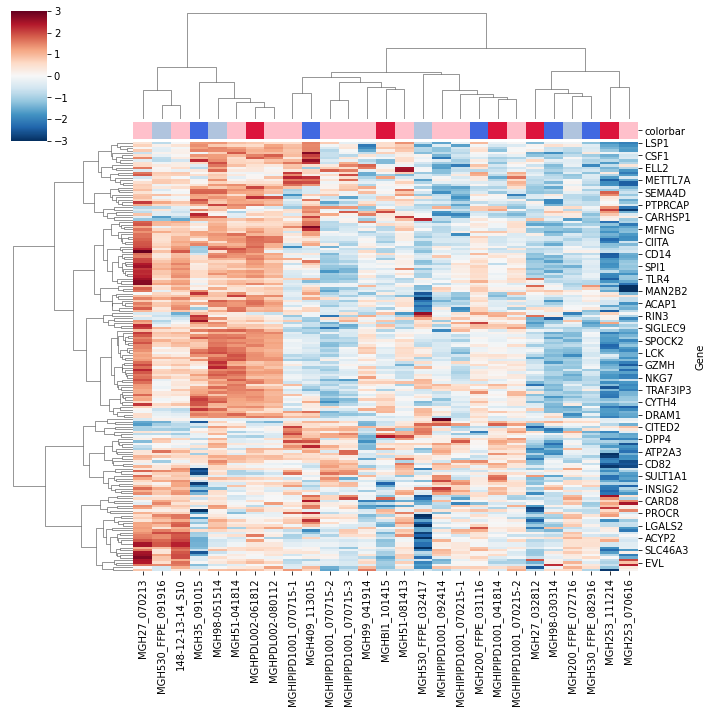

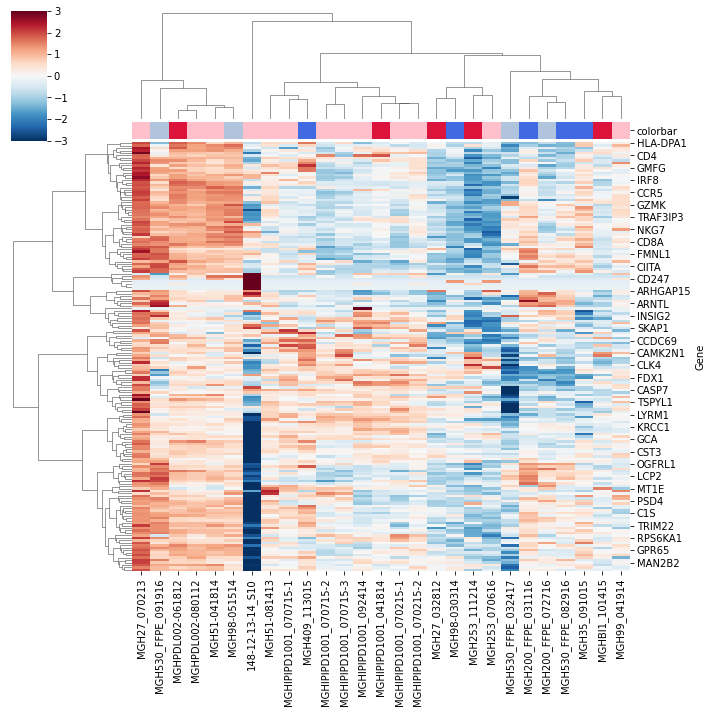

In [185]:
# REC
sns.clustermap(pca_168204_REC,
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])

plt.show()

# REC: original
sns.clustermap(log2exp2_168204_REC,
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

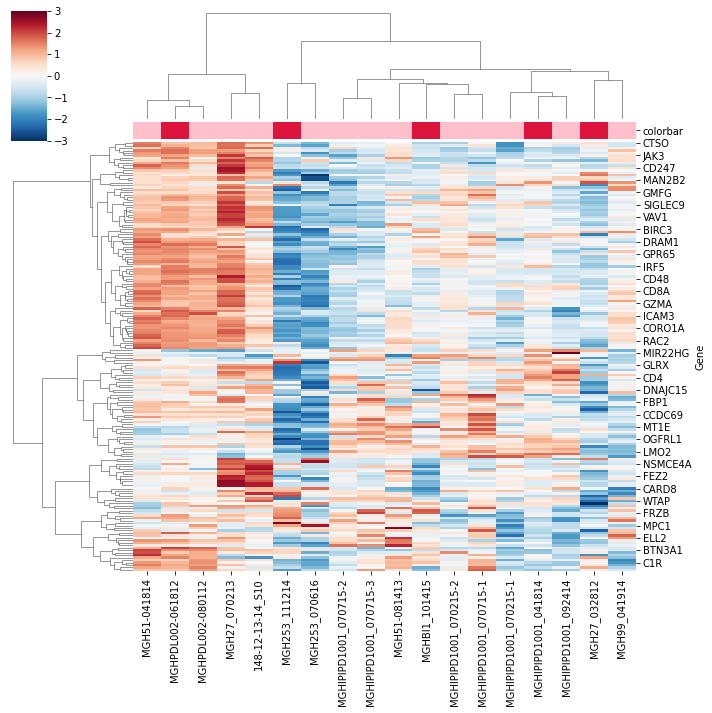

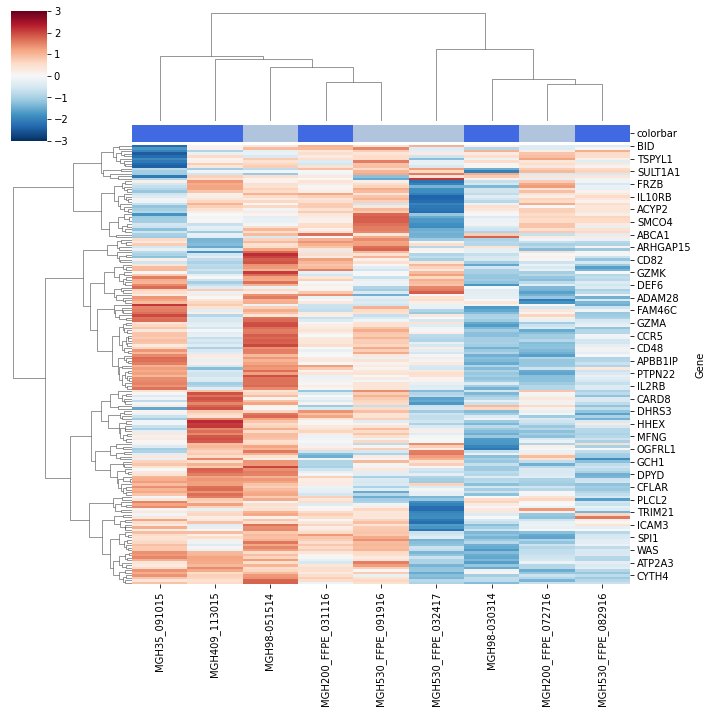

In [186]:
# REC in NR and R
tmp_NR = info_168204[info_168204['response'] == 'NR'].index
tmp_R = info_168204[info_168204['response'] == 'R'].index

sns.clustermap(pca_168204_REC[tmp_NR],
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

sns.clustermap(pca_168204_REC[tmp_R],
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_168204['colorbar'])
plt.show()

In [187]:
# calculate the foldchange
# REC in NR and R
tmp_NR = info_168204[info_168204['response'] == 'NR']
tmp_R = info_168204[info_168204['response'] == 'R']
log2fc_pca_168204 = df(pca_168204_new_df[tmp_NR[tmp_NR['time'] == 'POST'].index].mean(axis=1) - pca_168204_new_df[tmp_NR[tmp_NR['time'] == 'PRE'].index].mean(axis=1)).rename(columns={0: 'NR'})
log2fc_pca_168204['R'] = pca_168204_new_df[tmp_R[tmp_R['time'] == 'POST'].index].mean(axis=1) - pca_168204_new_df[tmp_R[tmp_R['time'] == 'PRE'].index].mean(axis=1)

C:\Users\ywang\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<AxesSubplot:xlabel='NR-R', ylabel='profile'>

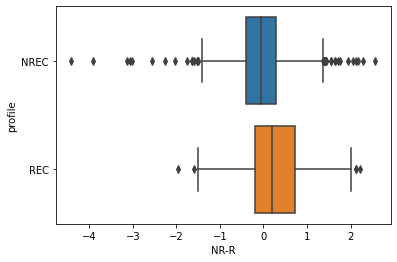

In [188]:
# add profile info
log2fc_pca_168204['profile'] = 'Unclassified'
for g in gene_sets['differential_foldchange_NRvR_down']:
    try:
        log2fc_pca_168204.at[g, 'profile'] = 'REC'
    except KeyError:
        pass
for g in gene_sets['differential_foldchange_NRvR_up']:
    try:
        log2fc_pca_168204.at[g, 'profile'] = 'NREC'
    except KeyError:
        pass  

log2fc_pca_168204['profile'].unique()

log2fc_pca_168204['NR-R'] = log2fc_pca_168204['NR'] - log2fc_pca_168204['R']

log2fc_pca_168204 = log2fc_pca_168204.dropna(axis=0, how='any')

sns.boxplot(x='NR-R', y='profile', data=log2fc_pca_168204[log2fc_168204['profile'] != 'Unclassified'])

In [189]:
log2fc_pca_168204 = log2fc_pca_168204.sort_values(by='NR-R', ascending=True)

In [196]:
log2fc_pca_168204

NR         R       profile      NR-R
Gene                                               
SPP1    -3.151747  2.215984  Unclassified -5.367731
FABP7   -1.994454  3.063246  Unclassified -5.057699
EDN3     0.316719  5.146361  Unclassified -4.829642
ALDH3B2  0.647361  5.446342  Unclassified -4.798981
EEF1A2  -0.759391  3.850695  Unclassified -4.610087
...           ...       ...           ...       ...
ADH1B    4.313675 -0.157301  Unclassified  4.470976
DPT      2.702390 -1.769732  Unclassified  4.472122
C6       3.112341 -1.983006  Unclassified  5.095347
PLIN1    3.304482 -2.003406  Unclassified  5.307888
ADIPOQ   4.715971 -0.912482  Unclassified  5.628453

[10050 rows x 4 columns]

In [193]:
# enrichment test: up
enrichr_defc_pca_168204_up = gp.enrichr(gene_list=list(log2fc_pca_168204['NR-R'][-500:].index),
                                   gene_sets=['MSigDB_Hallmark_2020', 'GO_Biological_Process_2021'],
                                   organism='Human',
                                   description='pca_sig_defc_168204_up',
                                   outdir='GSEA/pca_sig_defc_168204_up',
                                   cutoff=0.5)

# enrichment test: down
enrichr_defc_pca_168204_down = gp.enrichr(gene_list=list(log2fc_pca_168204['NR-R'][:500].index),
                                   gene_sets=['MSigDB_Hallmark_2020', 'GO_Biological_Process_2021'],
                                   organism='Human',
                                   description='pca_sig_defc_168204_down',
                                   outdir='GSEA/pca_sig_defc_168204_down',
                                   cutoff=0.5)

In [194]:
# NREC
enrichr_defc_pca_168204_up.results[:20]

Gene_set                               Term Overlap  \
0   MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  20/200   
1   MSigDB_Hallmark_2020          Interferon Gamma Response  19/200   
2   MSigDB_Hallmark_2020                       Adipogenesis  18/200   
3   MSigDB_Hallmark_2020                         Myogenesis  18/200   
4   MSigDB_Hallmark_2020          Interferon Alpha Response   10/97   
5   MSigDB_Hallmark_2020                  KRAS Signaling Up  15/200   
6   MSigDB_Hallmark_2020              Fatty Acid Metabolism  13/158   
7   MSigDB_Hallmark_2020                    Apical Junction  14/200   
8   MSigDB_Hallmark_2020              Xenobiotic Metabolism  13/200   
9   MSigDB_Hallmark_2020                     UV Response Dn   9/144   
10  MSigDB_Hallmark_2020                     UV Response Up   9/158   
11  MSigDB_Hallmark_2020                          Apoptosis   9/161   
12  MSigDB_Hallmark_2020              Inflammatory Response  10/200   
13  MSigDB_Hallmark_2020                  KRAS Signaling Dn  10/200   
14  MSigDB_Hallmark_2020                        Pperoxisome   6/104   
15  MSigDB_Hallmark_2020                        Coagulation   7/138   
16  MSigDB_Hallmark_2020                 Hedgehog Signaling    3/36   
17  MSigDB_Hallmark_2020               Bile Acid Metabolism   6/112   
18  MSigDB_Hallmark_2020             Estrogen Response Late   9/200   
19  MSigDB_Hallmark_2020                  Protein Secretion    5/96   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   1.571171e-07          0.000007            0                     0   
1   7.079766e-07          0.000016            0                     0   
2   3.012965e-06          0.000035            0                     0   
3   3.012965e-06          0.000035            0                     0   
4   1.567348e-04          0.001150            0                     0   
5   1.606980e-04          0.001150            0                     0   
6   1.749570e-04          0.001150            0                     0   
7   5.298567e-04          0.003047            0                     0   
8   1.625946e-03          0.008310            0                     0   
9   1.034889e-02          0.047605            0                     0   
10  1.805288e-02          0.075494            0                     0   
11  2.013687e-02          0.077191            0                     0   
12  2.930847e-02          0.096299            0                     0   
13  2.930847e-02          0.096299            0                     0   
14  4.635650e-02          0.142160            0                     0   
15  5.845624e-02          0.156509            0                     0   
16  6.037989e-02          0.156509            0                     0   
17  6.214609e-02          0.156509            0                     0   
18  6.464483e-02          0.156509            0                     0   
19  9.282859e-02          0.213506            0                     0   

    Odds Ratio  Combined Score  \
0     4.472222       70.063062   
1     4.216136       59.704087   
2     3.963841       50.390670   
3     3.963841       50.390670   
4     4.553835       39.895948   
5     3.229033       28.208782   
6     3.563195       30.825092   
7     2.991239       22.562625   
8     2.756910       17.703950   
9     2.629328       12.018332   
10    2.380555        9.556618   
11    2.333208        9.111651   
12    2.074114        7.321370   
13    2.074114        7.321370   
14    2.404610        7.385506   
15    2.099361        5.961086   
16    3.560819        9.995574   
17    2.222214        6.173904   
18    1.853051        5.075224   
19    2.154401        5.121013   

                                                Genes  
0   LRRC15;ECM2;DST;PCOLCE2;IL15;LUM;THY1;FGF2;FBL...  
1   CIITA;RSAD2;IL15;P2RY14;HLA-B;TNFAIP2;IFI44;US...  
2   ITIH5;CDKN2C;CHUK;GPX3;PTGER3;ADIPOQ;CIDEA;CYP...  
3   CFD;VIPR1;CTF1;ACTN2;ITGB4;GPX3;FST;LDB3;SORBS.

In [195]:
# REC
enrichr_defc_pca_168204_down.results[:20]

Gene_set                               Term Overlap  \
0   MSigDB_Hallmark_2020            Estrogen Response Early  21/200   
1   MSigDB_Hallmark_2020             Estrogen Response Late  20/200   
2   MSigDB_Hallmark_2020              Inflammatory Response  19/200   
3   MSigDB_Hallmark_2020      TNF-alpha Signaling via NF-kB  18/200   
4   MSigDB_Hallmark_2020                         Complement  18/200   
5   MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  17/200   
6   MSigDB_Hallmark_2020                         Glycolysis  17/200   
7   MSigDB_Hallmark_2020                  KRAS Signaling Dn  17/200   
8   MSigDB_Hallmark_2020                            Hypoxia  15/200   
9   MSigDB_Hallmark_2020                  KRAS Signaling Up  15/200   
10  MSigDB_Hallmark_2020                       Angiogenesis    6/36   
11  MSigDB_Hallmark_2020                         Myogenesis  14/200   
12  MSigDB_Hallmark_2020                   mTORC1 Signaling  13/200   
13  MSigDB_Hallmark_2020                Pancreas Beta Cells    4/40   
14  MSigDB_Hallmark_2020                     UV Response Up   9/158   
15  MSigDB_Hallmark_2020                          Apoptosis   9/161   
16  MSigDB_Hallmark_2020                    Spermatogenesis   8/135   
17  MSigDB_Hallmark_2020                        Coagulation   8/138   
18  MSigDB_Hallmark_2020               IL-2/STAT5 Signaling  10/199   
19  MSigDB_Hallmark_2020                        p53 Pathway  10/200   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   3.300384e-08          0.000002            0                     0   
1   1.571171e-07          0.000004            0                     0   
2   7.079766e-07          0.000012            0                     0   
3   3.012965e-06          0.000030            0                     0   
4   3.012965e-06          0.000030            0                     0   
5   1.208098e-05          0.000074            0                     0   
6   1.208098e-05          0.000074            0                     0   
7   1.208098e-05          0.000074            0                     0   
8   1.606980e-04          0.000787            0                     0   
9   1.606980e-04          0.000787            0                     0   
10  2.439320e-04          0.001087            0                     0   
11  5.298567e-04          0.002164            0                     0   
12  1.625946e-03          0.006129            0                     0   
13  1.733305e-02          0.058475            0                     0   
14  1.805288e-02          0.058475            0                     0   
15  2.013687e-02          0.058475            0                     0   
16  2.028731e-02          0.058475            0                     0   
17  2.280213e-02          0.062072            0                     0   
18  2.845040e-02          0.068386            0                     0   
19  2.930847e-02          0.068386            0                     0   

    Odds Ratio  Combined Score  \
0     4.732170       81.519401   
1     4.472222       70.063062   
2     4.216136       59.704087   
3     3.963841       50.390670   
4     3.963841       50.390670   
5     3.715270       42.071265   
6     3.715270       42.071265   
7     3.715270       42.071265   
8     3.229033       28.208782   
9     3.229033       28.208782   
10    7.882591       65.572288   
11    2.991239       22.562625   
12    2.756910       17.703950   
13    4.360215       17.681282   
14    2.380555        9.556618   
15    2.333208        9.111651   
16    2.480379        9.667921   
17    2.422764        9.160232   
18    2.085196        7.422449   
19    2.074114        7.321370   

                                                Genes  
0   LAD1;TFAP2C;EGR3;ELOVL2;KRT8;SLC2A1;ADCY1;CELS...  
1   GINS2;DUSP2;TFAP2C;EGR3;SERPINA1;CYP4F11;TPD52...  
2   CXCL6;CD40;CXCL8;RGS16;AQP9;SERPINE1;LIF;SLC1A...  
3   DUSP4;EGR1;DUSP5;CXCL6;EGR2;DUSP2;EGR3;SERPINB.

# 2. GSE115821

In [64]:
# GSE115821 original expression
expr_115821 = pd.read_csv(data_home + 'GSE115821/GSE115821_MGH_counts_cleaned.csv',
                          index_col=0, header=0, sep=',')
expr_115821.index = expr_115821.index.astype(str)
# overlap with the L1000 space
expr_115821 = expr_115821[expr_115821.index.isin(bing_landmark['Official NCBI gene symbol'])]

# read clinical information
info_115821 = pd.read_csv(data_home + 'GSE115821/GSE115821_patient_info_cleaned.csv',
                          index_col=0, header=0, sep=',')
print(expr_115821.shape, info_115821.shape)

(10059, 37) (37, 4)


In [65]:
info_115821

timepoint              treatment response  batch
sample                                                               
115-031814.bam             PRE            anti-CTLA-4       NR      1
115-041514.bam              ON            anti-CTLA-4       NR      1
MGH272-020415.bam           ON            anti-CTLA-4       NR      1
MGH272-121914.bam          PRE            anti-CTLA-4       NR      1
MGH422-092815.bam          PRE  anti-PD-1+anti-CTLA-4        R      1
MGH422-110515.bam           ON  anti-PD-1+anti-CTLA-4        R      1
MGH208_031115-1.bam        PRE              anti-PD-1       NR      1
MGH208_031115-2.bam        PRE              anti-PD-1       NR      1
MGH208_051315.bam           ON              anti-PD-1       NR      1
MGH39_033114.bam           PRE              anti-PD-1       NR      1
MGH39_082514-1.bam          ON              anti-PD-1       NR      1
MGH39_082514-2.bam          ON              anti-PD-1       NR      1
MGH39_082514-3.bam          ON              anti-PD-1       NR      1
MGH39_082514-4.bam          ON              anti-PD-1       NR      1
MGH39_082514-5.bam          ON              anti-PD-1       NR      1
MGH39_103114.bam            ON              anti-PD-1       NR      1
MGH42_101714.bam           PRE              anti-PD-1       NR      1
MGH42_101714_1.bam         PRE              anti-PD-1       NR      1
MGH42_112414.bam            ON              anti-PD-1       NR      1
MGH42_112414_1.bam          ON              anti-PD-1       NR      1
MGH42_122914-1.bam          ON              anti-PD-1       NR      1
MGH42_122914-2_1.bam        ON              anti-PD-1       NR      1
MGH42_122914_1.bam          ON              anti-PD-1       NR      1
148-6-5-14_S9.bam          PRE              anti-PD-1        R      2
208-10-22-14_S12.bam        ON            anti-CTLA-4       NR      2
208-3-11-15_S13.bam        PRE              anti-PD-1       NR      2
208-5-13-15_S14.bam         ON              anti-PD-1       NR      2
208-9-10-14_S11.bam        PRE            anti-CTLA-4       NR      2
39-10-31-14_S17.bam         ON              anti-PD-1       NR      2
39-3-31-14_S15.bam         PRE              anti-PD-1       NR      2
39-8-25-14_S16.bam          ON              anti-PD-1       NR      2
42-10-17-14_S3.bam         PRE              anti-PD-1       NR      2
42-11-24-14_S4.bam          ON              anti-PD-1       NR      2
42-12-30-14_S5.bam          ON              anti-PD-1       NR      2
62-10-2-13_S6.bam          PRE  anti-PD-1+anti-CTLA-4       NR      2
62-5-27-14_S7.bam           ON  anti-PD-1+anti-CTLA-4       NR      2
62-7-8-14_S8.bam            ON              anti-PD-1       NR      2

In [66]:
expr_115821.columns

Index(['39-3-31-14_S15.bam', 'MGH39_082514-1.bam', '208-9-10-14_S11.bam',
       'MGH42_101714.bam', 'MGH208_051315.bam', '62-10-2-13_S6.bam',
       '115-041514.bam', '115-031814.bam', '208-10-22-14_S12.bam',
       'MGH208_031115-2.bam', 'MGH42_112414.bam', '42-12-30-14_S5.bam',
       'MGH39_082514-4.bam', '39-10-31-14_S17.bam', 'MGH39_082514-3.bam',
       'MGH39_033114.bam', 'MGH42_112414_1.bam', 'MGH272-121914.bam',
       'MGH42_122914-1.bam', 'MGH39_082514-5.bam', 'MGH42_122914_1.bam',
       'MGH208_031115-1.bam', 'MGH422-092815.bam', 'MGH42_122914-2_1.bam',
       '148-6-5-14_S9.bam', 'MGH272-020415.bam', '42-10-17-14_S3.bam',
       'MGH42_101714_1.bam', '62-7-8-14_S8.bam', '208-5-13-15_S14.bam',
       'MGH39_082514-2.bam', '39-8-25-14_S16.bam', 'MGH39_103114.bam',
       'MGH422-110515.bam', '62-5-27-14_S7.bam', '42-11-24-14_S4.bam',
       '208-3-11-15_S13.bam'],
      dtype='object')

In [67]:
pd.crosstab(info_115821['timepoint'], info_115821['response'])

response   NR  R
timepoint       
ON         22  1
PRE        12  2

In [29]:
log2exp2_115821 = np.log2(expr_115821 + 1)

# collapse duplicates
log2exp2_115821 = log2exp2_115821.groupby(level=0).mean()

In [34]:
# take the subset
log2exp2_115821_NREC = log2exp2_115821[log2exp2_115821.index.isin(gene_sets['NREC_profile'])]
log2exp2_115821_REC = log2exp2_115821[log2exp2_115821.index.isin(gene_sets['REC_profile'])]

log2exp2_115821_EC = log2exp2_115821[log2exp2_115821.index.isin(gene_sets['REC_profile'] + gene_sets['NREC_profile'])]

In [32]:
# add color
lut_115821 = {'R': {'PRE': 'royalblue', 'ON': 'lightsteelblue'}, 'NR': {'PRE': 'crimson', 'ON': 'pink'}}

In [33]:
info_115821['colorbar'] = ''
for p in info_115821.index:
    info_115821.at[p, 'colorbar'] = lut_115821[info_115821.loc[p, 'response']][info_115821.loc[p, 'timepoint']]

## 2.1 Visualize the NREC and REC profiles

/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


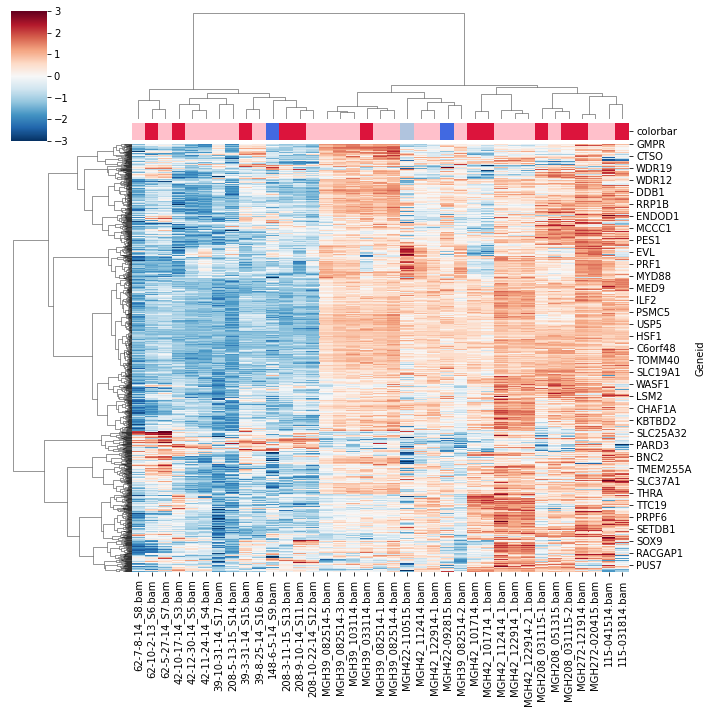

In [77]:
# all EC
sns.clustermap(log2exp2_115821_EC[log2exp2_115821_EC > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])

/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


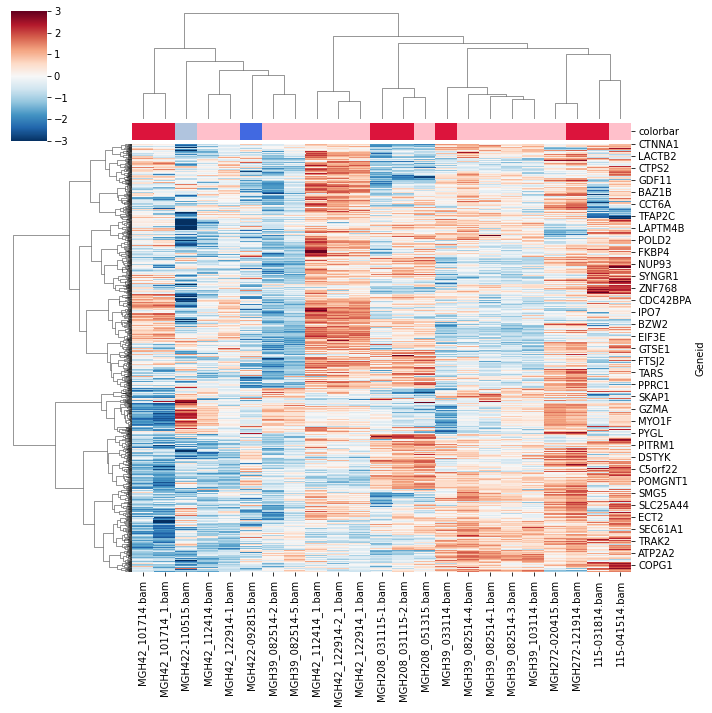

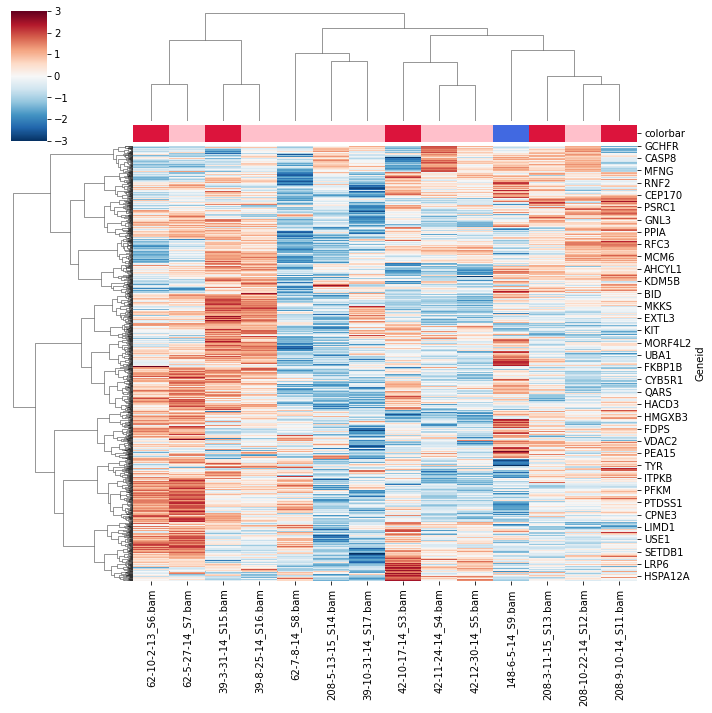

In [81]:
for b in info_115821['batch'].unique():
    tmp_b = info_115821[info_115821['batch'] == b]
    tmp_b_expr = log2exp2_115821_EC[tmp_b.index]
    sns.clustermap(tmp_b_expr[tmp_b_expr > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])

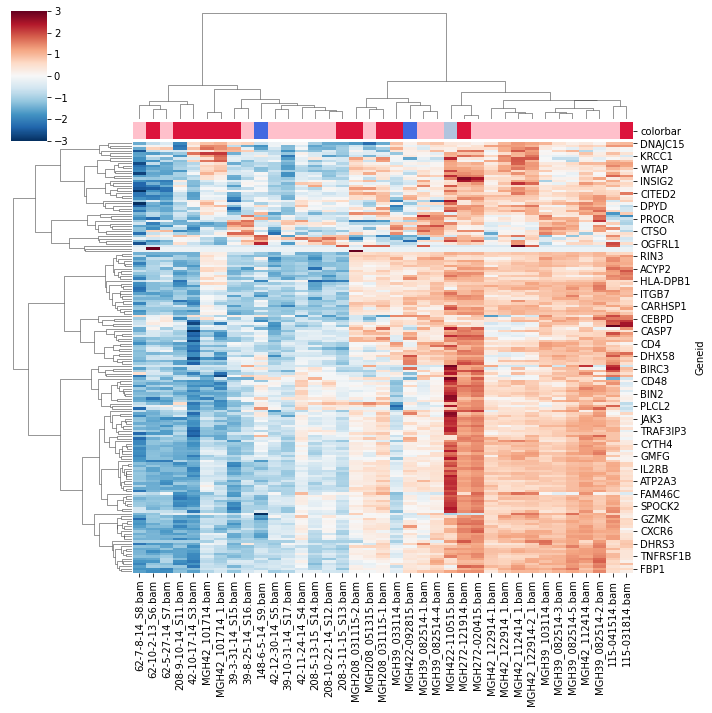

In [53]:
# REC
sns.clustermap(log2exp2_115821_REC[log2exp2_115821_REC > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])

anti-CTLA-4


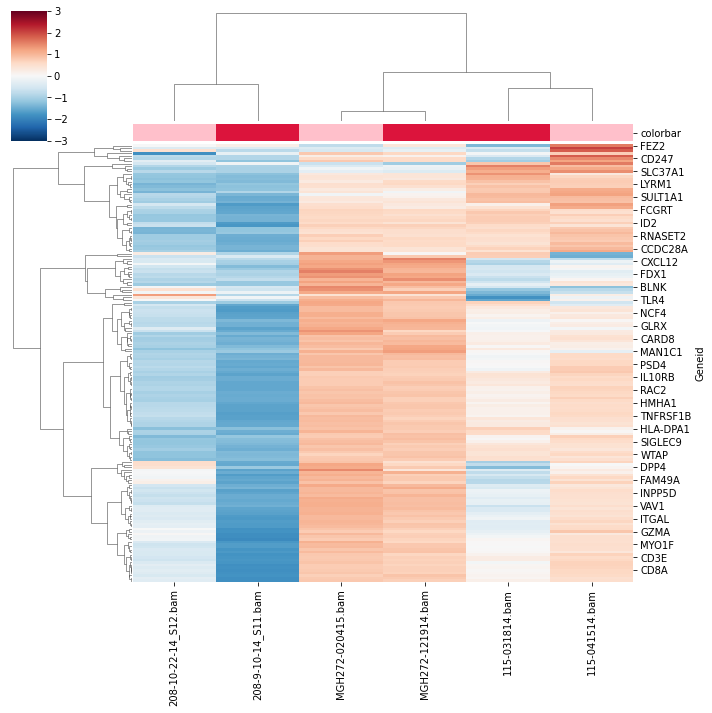

anti-PD-1+anti-CTLA-4


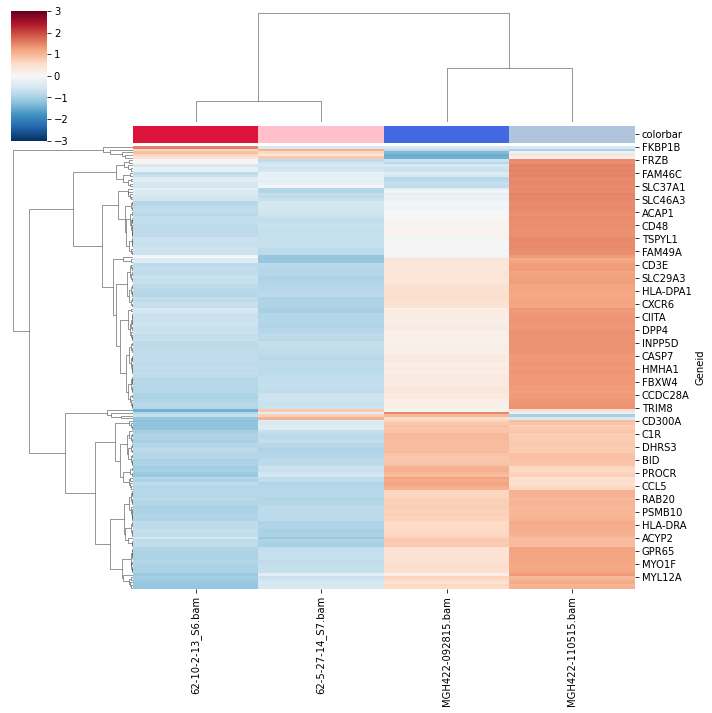

anti-PD-1


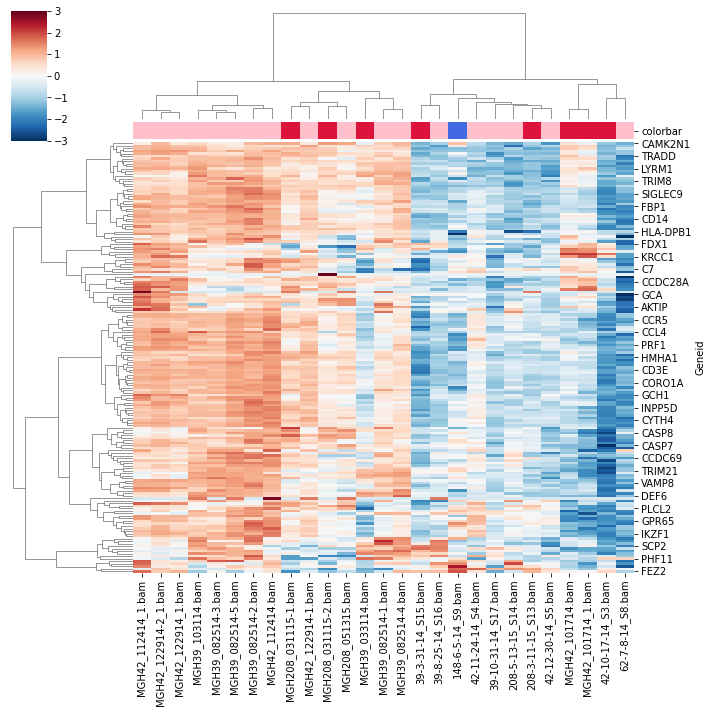

In [55]:
# REC by treatment
for tr in info_115821['treatment'].unique():
    tmp_tr = info_115821[info_115821['treatment'] == tr]
    print(tr)
    sns.clustermap(log2exp2_115821_REC[tmp_tr.index][log2exp2_115821_REC[tmp_tr.index] > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])
    plt.show()

C:\Users\ywang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


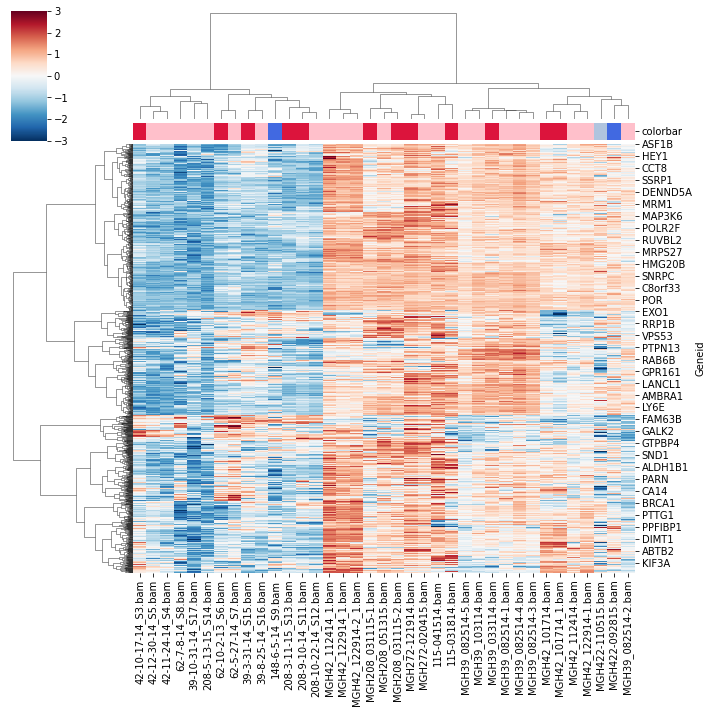

In [54]:
# NREC
sns.clustermap(log2exp2_115821_NREC[log2exp2_115821_NREC > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])

anti-CTLA-4


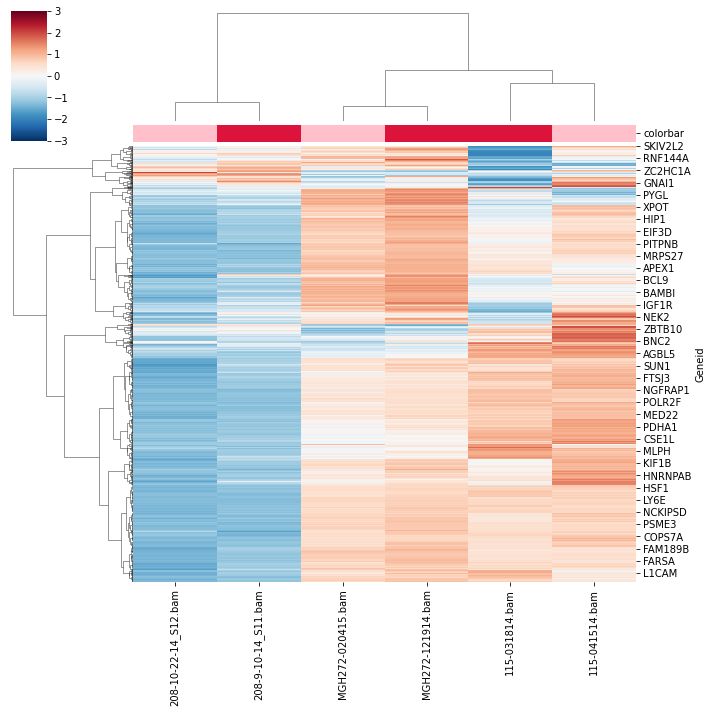

anti-PD-1+anti-CTLA-4


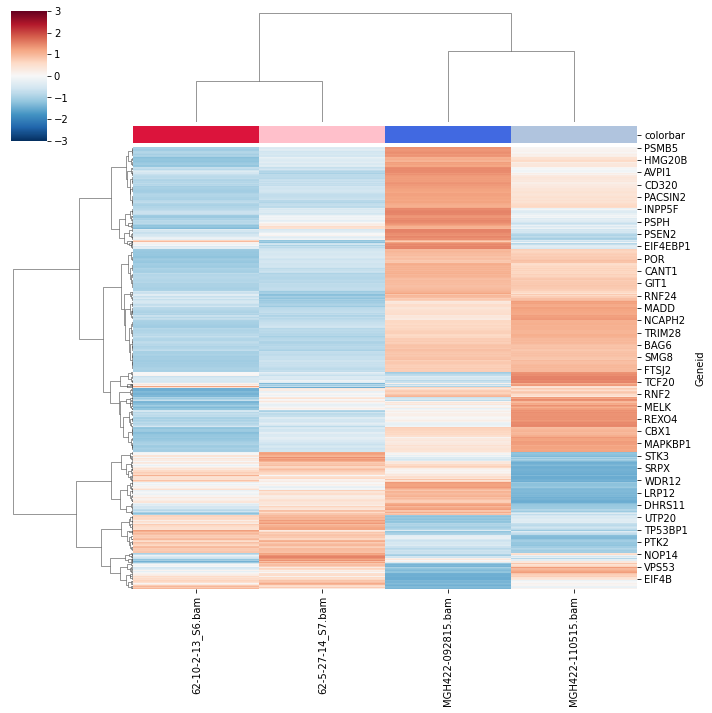

anti-PD-1


C:\Users\ywang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


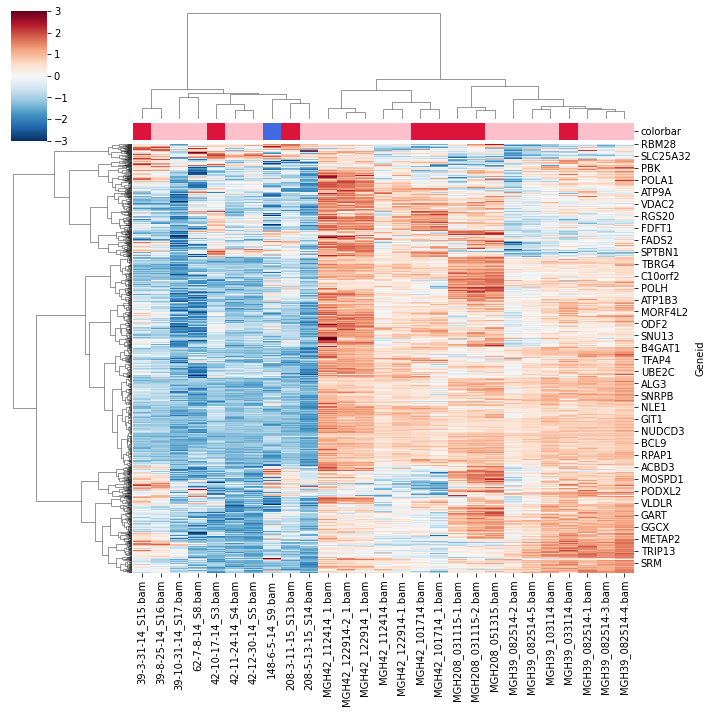

In [56]:
# NREC by treatment
for tr in info_115821['treatment'].unique():
    tmp_tr = info_115821[info_115821['treatment'] == tr]
    print(tr)
    sns.clustermap(log2exp2_115821_NREC[tmp_tr.index][log2exp2_115821_NREC[tmp_tr.index] > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])
    plt.show()

In [ ]:
# this data has significant batch effect

## 2.2 Batch effect

In [96]:
# PCA on original space
pca_115821_model = PCA(random_state=0).fit(log2exp2_115821.T)
pca_115821 = PCA(random_state=0).fit_transform(log2exp2_115821.T)

pca_115821_coord = df(columns=['PCA-1', 'PCA-2'])
for i in range(len(log2exp2_115821.columns)):
    pca_115821_coord.at[log2exp2_115821.columns[i], 'PCA-1'] = pca_115821[i][0]
    pca_115821_coord.at[log2exp2_115821.columns[i], 'PCA-2'] = pca_115821[i][1]

pca_115821_coord['batch'] = info_115821['batch']
pca_115821_coord['treatment'] = info_115821['treatment']
pca_115821_coord['response'] = info_115821['response']

<AxesSubplot:xlabel='PCA-1', ylabel='PCA-2'>

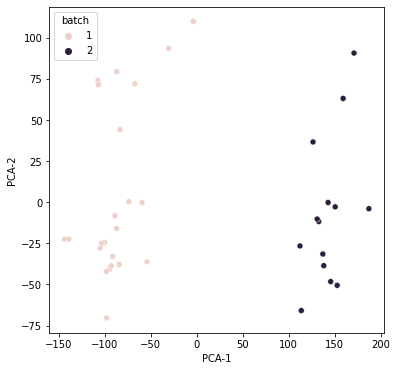

In [99]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA-1', y='PCA-2', hue='batch', data=pca_115821_coord)

<AxesSubplot:xlabel='PCA-1', ylabel='PCA-2'>

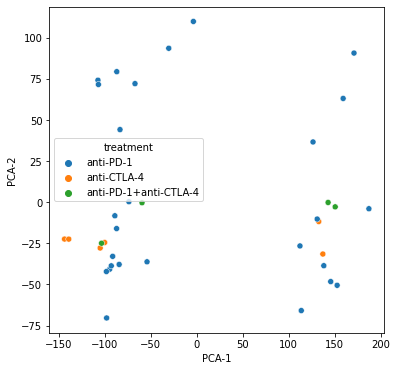

In [101]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA-1', y='PCA-2', hue='treatment', data=pca_115821_coord)

<AxesSubplot:xlabel='PCA-1', ylabel='PCA-2'>

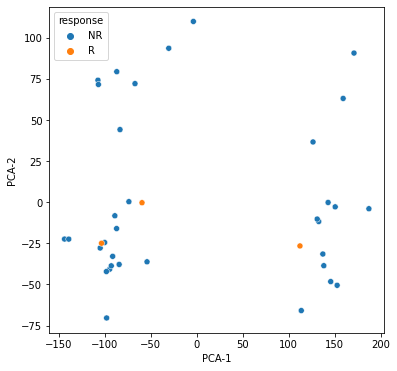

In [102]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA-1', y='PCA-2', hue='response', data=pca_115821_coord)

In [103]:
# exclude the first component
pca_115821_rm1 = []
for f in pca_115821:
    f[0] = 0
    pca_115821_rm1.append(f)
pca_115821_new = pca_115821_model.inverse_transform(pca_115821_rm1)

In [104]:
pca_115821_new.shape

(37, 10059)

In [105]:
pca_115821_new_df = df(pca_115821_new.T, index=log2exp2_115821.index, columns=log2exp2_115821.columns)

In [106]:
pca_115821_new_df

39-3-31-14_S15.bam  MGH39_082514-1.bam  208-9-10-14_S11.bam  \
Geneid                                                                
A2M              14.718493           15.072739            12.341968   
A4GALT            4.084354            6.848280             6.823429   
AAAS              8.163457            7.207221             5.468972   
AACS              8.953250            9.321014             8.647458   
AADAC             0.805865            5.459602             4.936621   
...                    ...                 ...                  ...   
ZWINT             4.003791            3.386135             5.495528   
ZXDC              9.590417            9.112853             8.543982   
ZYX               8.929615            9.528634             9.868511   
ZZEF1            11.062265           10.697577            10.109250   
ZZZ3             11.459628           10.455410            10.249198   

        MGH42_101714.bam  MGH208_051315.bam  62-10-2-13_S6.bam  \
Geneid                                                           
A2M            12.105575          13.662090          15.302453   
A4GALT          6.322599           6.006290           5.856113   
AAAS            7.600644           7.097788           8.215322   
AACS            8.707438           8.295708           8.833858   
AADAC           3.042729           1.688594          -0.211533   
...                  ...                ...                ...   
ZWINT           3.935647           3.997501           3.545981   
ZXDC            8.606903           8.264303           9.436115   
ZYX            10.292608          10.502435           9.773173   
ZZEF1          10.893334          10.692450          10.734517   
ZZZ3            9.339708          10.452912          11.544028   

        115-041514.bam  115-031814.bam  208-10-22-14_S12.bam  \
Geneid                                                         
A2M          15.557632       14.235667             13.347685   
A4GALT        3.060089        5.384629              7.045752   
AAAS          7.487985        7.758928              5.662273   
AACS          7.311225        8.314185              7.819026   
AADAC         1.732473        2.140658              1.813595   
...                ...             ...                   ...   
ZWINT         2.828814        2.141933              4.169688   
ZXDC          9.606656        9.145025              8.443635   
ZYX          10.264813        9.785719             10.129235   
ZZEF1        11.763779       11.045043             10.334363   
ZZZ3         11.764978       12.008188              9.888421   

        MGH208_031115-2.bam  ...  MGH42_101714_1.bam  62-7-8-14_S8.bam  \
Geneid                       ...                                         
A2M               12.866703  ...           11.519598         15.470033   
A4GALT             6.406802  ...            4.802790          6.283486   
AAAS               7.239451  ...            8.112639          6.838119   
AACS               8.651283  ...            8.793741          7.632902   
AADAC              2.122412  ...            2.327069          0.736970   
...                     ...  ...                 ...               ...   
ZWINT              4.353280  ...            5.284359          3.922346   
ZXDC               8.082354  ...            8.460766          9.466324   
ZYX               10.028233  ...            9.730844         11.007192   
ZZEF1             10.675359  ...           10.794996         11.428432   
ZZZ3              10.336728  ...            9.786021         10.840287   

        208-5-13-15_S14.bam  MGH39_082514-2.bam  39-8-25-14_S16.bam  \
Geneid                                                                
A2M               12.524907           15.236094           14.916315   
A4GALT             7.752301            8.381035            6.173983   
AAAS               6.740548            7.056658            7.949544   
AACS               9.476313            8.246456            9.285969   
AAD

In [107]:
# take the subset
pca_115821_NREC = pca_115821_new_df[pca_115821_new_df.index.isin(gene_sets['differential_foldchange_NRvR_up'])]
pca_115821_REC = pca_115821_new_df[pca_115821_new_df.index.isin(gene_sets['differential_foldchange_NRvR_down'])]

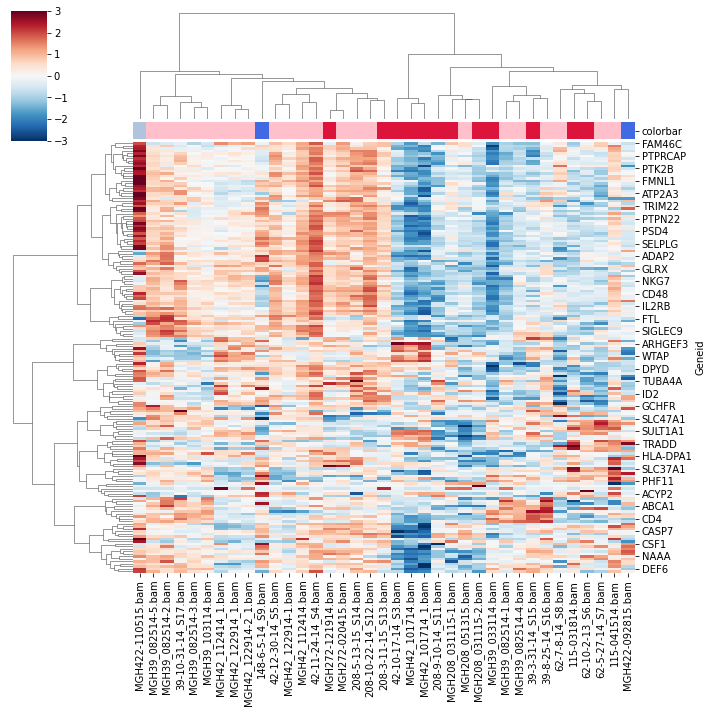

In [108]:
# REC
sns.clustermap(pca_115821_REC[pca_115821_REC > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])

anti-CTLA-4


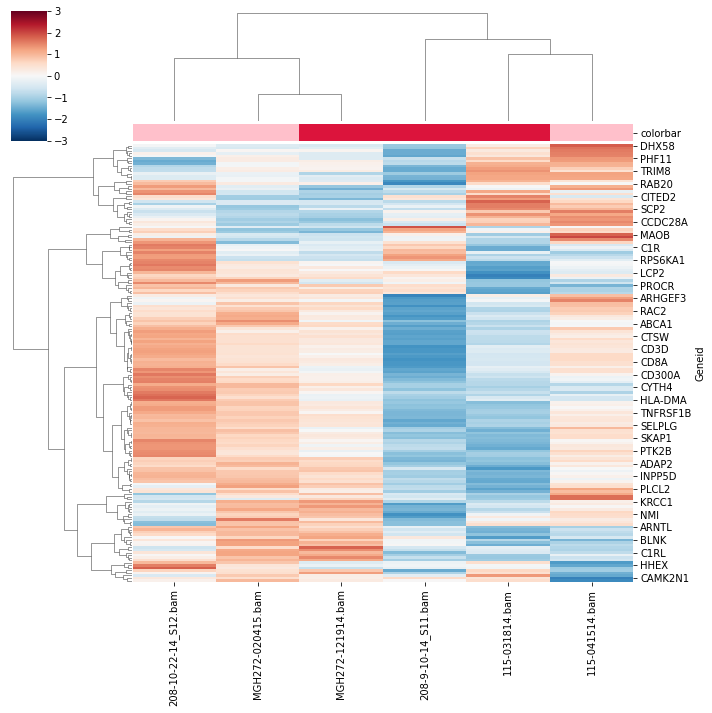

anti-PD-1+anti-CTLA-4


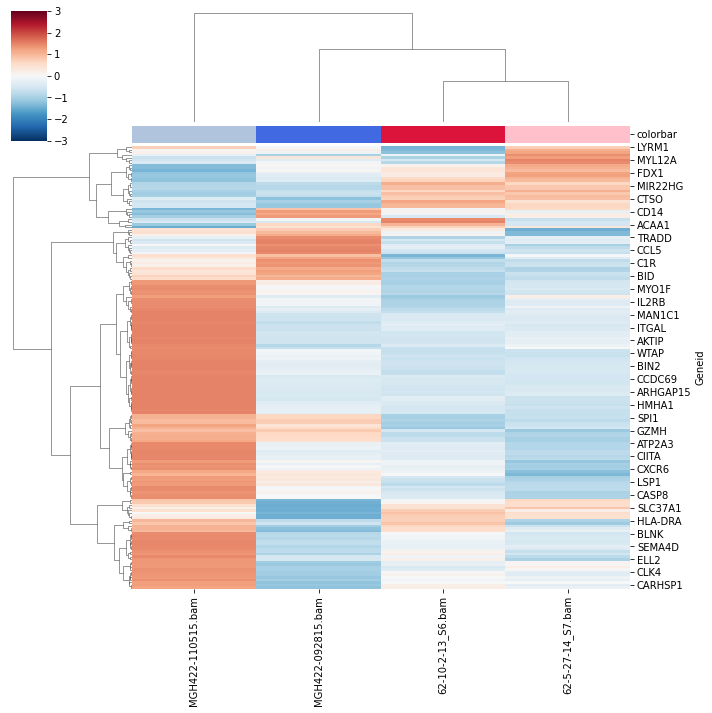

anti-PD-1


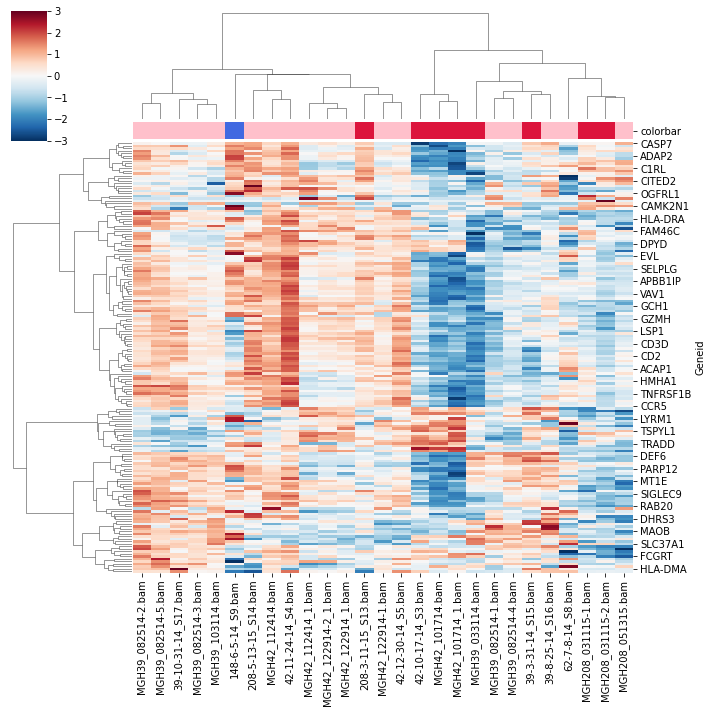

In [112]:
# REC by treatment
for tr in info_115821['treatment'].unique():
    tmp_tr = info_115821[info_115821['treatment'] == tr]
    print(tr)
    sns.clustermap(pca_115821_REC[tmp_tr.index][pca_115821_REC[tmp_tr.index] > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])
    plt.show()

C:\Users\ywang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


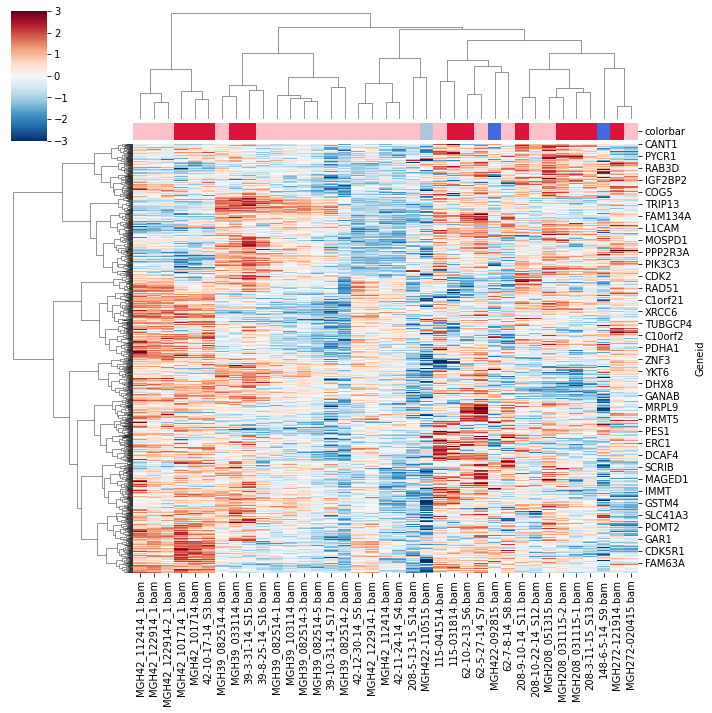

In [109]:
# NREC
sns.clustermap(pca_115821_NREC[pca_115821_NREC > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])

anti-CTLA-4


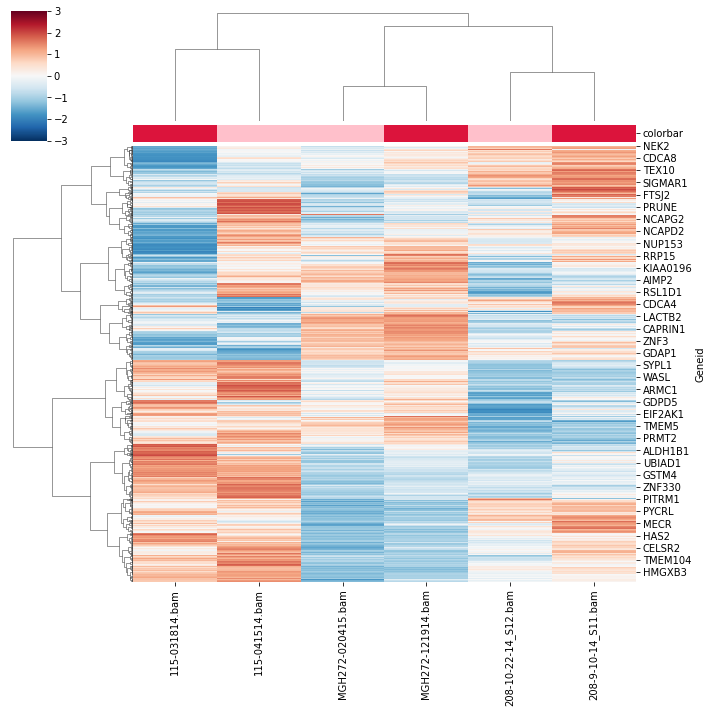

anti-PD-1+anti-CTLA-4


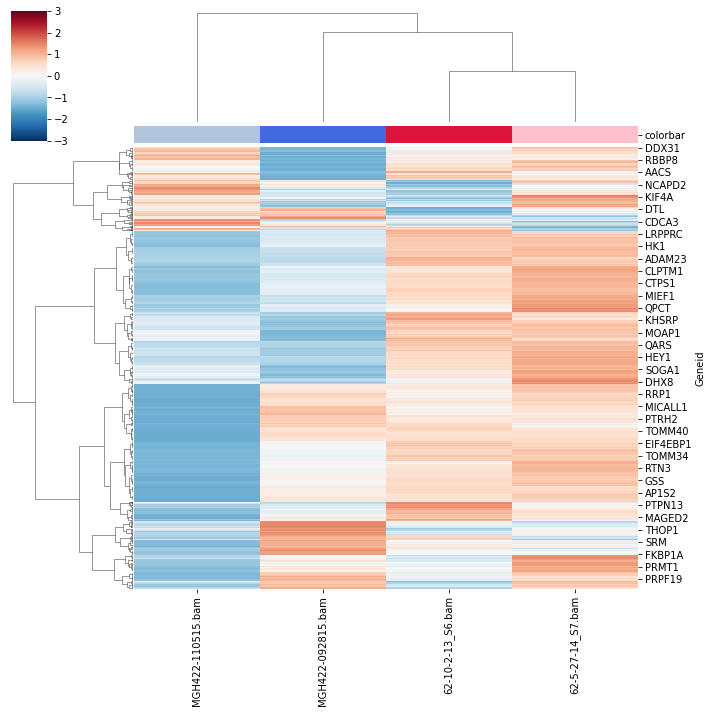

anti-PD-1


C:\Users\ywang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


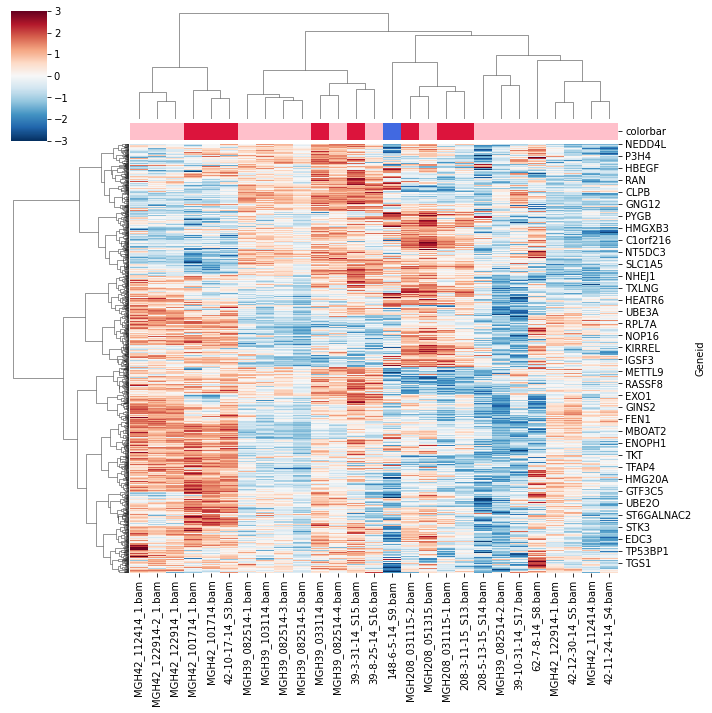

In [113]:
# NREC by treatment
for tr in info_115821['treatment'].unique():
    tmp_tr = info_115821[info_115821['treatment'] == tr]
    print(tr)
    sns.clustermap(pca_115821_NREC[tmp_tr.index][pca_115821_NREC[tmp_tr.index] > 0].dropna(axis=0, how='all').fillna(0),
               z_score=0,
               cmap='RdBu_r',
               vmax=3,
               vmin=-3,
               method='ward',
               col_colors=info_115821['colorbar'])
    plt.show()

In [110]:
# PCA on space without first component
pca_115821_new = PCA(random_state=0).fit_transform(pca_115821_new_df.T)

pca_115821_new_coord = df(columns=['PCA-1', 'PCA-2'])
for i in range(len(log2exp2_115821.columns)):
    pca_115821_new_coord.at[log2exp2_115821.columns[i], 'PCA-1'] = pca_115821_new[i][0]
    pca_115821_new_coord.at[log2exp2_115821.columns[i], 'PCA-2'] = pca_115821_new[i][1]

pca_115821_new_coord['batch'] = info_115821['batch']
pca_115821_new_coord['treatment'] = info_115821['treatment']
pca_115821_new_coord['response'] = info_115821['response']

<AxesSubplot:xlabel='PCA-1', ylabel='PCA-2'>

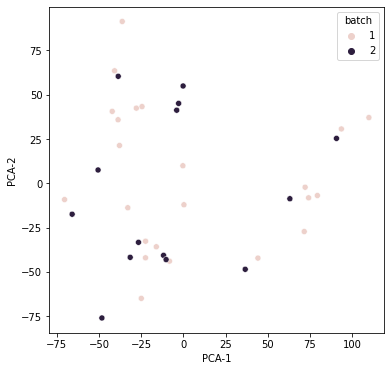

In [111]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA-1', y='PCA-2', hue='batch', data=pca_115821_new_coord)